# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

Timmy's reading material about clustering: https://bpostance.github.io/posts/clustering-mixed-data/

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv("Udacity_AZDIAS_Subset.csv",sep=';')

# Load in the feature summary file.
feat_info = pd.read_csv("AZDIAS_Feature_Summary.csv",sep=';')

In [3]:
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


From the dataframe head above, I can get rough idea what the next step should be. Point number 1 and 2 will be performed right below, while point number 3 and 4 will be done in the next section (STEP 1).
1. there are 85 columns -> How many rows?
2. almost all data are numbers -> Are there other datatypes?
3. need to deal with missing values -> Impute missing values.
4. some numbers are expressed as float and the others as integer -> Need to convert/encode the features (ordinal/categorical)

Check the shape of general population dataframe

In [ ]:
# check the shape
print("azdias rows count: ", azdias.shape[0])
print("azdias cols count: ", azdias.shape[1])

azdias rows count:  891221
azdias cols count:  85


#### Explore the datatype

In [ ]:
# check the datatype
pd.Series(index=azdias.dtypes.values).fillna(1).groupby(level=0).count()

/tmp/ipykernel_813/2032519779.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series(index=azdias.dtypes.values).fillna(1).groupby(level=0).count()


int64      32
float64    49
object      4
dtype: int64

##### exploring "object" dtype in azdias data frame

In [3]:
print("columns with object datatype are:")
obj_col_name = azdias.dtypes[azdias.dtypes == 'object'].index.values
obj_col_name

columns with object datatype are:


array(['OST_WEST_KZ', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015',
       'CAMEO_INTL_2015'], dtype=object)

In [ ]:
# show the value of those "object" columns
azdias.loc[:,obj_col_name].sample(5)

,OST_WEST_KZ,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015
520086,W,4,4A,22
697456,O,4,4C,24
374767,W,4,4A,22
46337,W,9,9C,51
596963,W,5,5F,35


The "OST_WEST_KZ" and "CAMEO_DEU_2015" are string, so it is reasonable to have object datatype. However for column "CAME_DEUG_2015" and "CAMEO_INTL_2015" their data seems like number. Perhaps it is better to convert their datatype. But before that let's see what is the definition of columns above. 

In [ ]:
feat_info[feat_info["attribute"].isin(obj_col_name)]

,attribute,information_level,type,missing_or_unknown
55,OST_WEST_KZ,building,categorical,[-1]
57,CAMEO_DEUG_2015,microcell_rr4,categorical,"[-1,X]"
58,CAMEO_DEU_2015,microcell_rr4,categorical,[XX]
59,CAMEO_INTL_2015,microcell_rr4,mixed,"[-1,XX]"


Hmmmm, the information in the feat_info dataframe doesn't give complete picture. Let's check the description of *CAMEO_DEUG_2015* and *CAMEO_INTL_2015* manually from `Data_Dictionary.md`

    4.1. CAMEO_DEUG_2015
    German CAMEO: Wealth / Life Stage Typology, rough scale
    - -1: unknown
    -  1: upper class
    -  2: upper middleclass
    -  3: established middleclass
    -  4: consumption-oriented middleclass
    -  5: active middleclass
    -  6: low-consumption middleclass
    -  7: lower middleclass
    -  8: working class
    -  9: urban working class
    -  X: unknown

    4.3. CAMEO_INTL_2015
    German CAMEO: Wealth / Life Stage Typology, mapped to international code
    - -1: unknown
    - 11: Wealthy Households - Pre-Family Couples & Singles
    - 12: Wealthy Households - Young Couples With Children
    - 13: Wealthy Households - Families With School Age Children
    - 14: Wealthy Households - Older Families &  Mature Couples
    - 15: Wealthy Households - Elders In Retirement
    - 21: Prosperous Households - Pre-Family Couples & Singles
    - 22: Prosperous Households - Young Couples With Children
    - 23: Prosperous Households - Families With School Age Children
    - 24: Prosperous Households - Older Families & Mature Couples
    - 25: Prosperous Households - Elders In Retirement
    - 31: Comfortable Households - Pre-Family Couples & Singles
    - 32: Comfortable Households - Young Couples With Children
    - 33: Comfortable Households - Families With School Age Children
    - 34: Comfortable Households - Older Families & Mature Couples
    - 35: Comfortable Households - Elders In Retirement
    - 41: Less Affluent Households - Pre-Family Couples & Singles
    - 42: Less Affluent Households - Young Couples With Children
    - 43: Less Affluent Households - Families With School Age Children
    - 44: Less Affluent Households - Older Families & Mature Couples
    - 45: Less Affluent Households - Elders In Retirement
    - 51: Poorer Households - Pre-Family Couples & Singles
    - 52: Poorer Households - Young Couples With Children
    - 53: Poorer Households - Families With School Age Children
    - 54: Poorer Households - Older Families & Mature Couples
    - 55: Poorer Households - Elders In Retirement
    - XX: unknown

From the description above, it makes sense to let column *CAMEO_DEUG_2015* and *CAMEO_INTL_2015* to be object datatype as they are categorical data, i.e. there is no clear way to rank the value.

##### exploring dtype in feature summary `feat_info`
Let's review again the feature summary in `feat_info`

In [ ]:
feat_info

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
...,...,...,...,...
80,PLZ8_HHZ,macrocell_plz8,ordinal,[-1]
81,PLZ8_GBZ,macrocell_plz8,ordinal,[-1]
82,ARBEIT,community,ordinal,"[-1,9]"
83,ORTSGR_KLS9,community,ordinal,"[-1,0]"


I want to know if all attributes within the same 'type' in feat_info dataframe correspond to the same dtype in azdias.dtypes. 
Now, let's show the data types of each column in azdias.

In [4]:
dtype_df = pd.DataFrame(azdias.dtypes,index=azdias.dtypes.index,columns=['dtypes'])
dtype_df

,dtypes
AGER_TYP,int64
ALTERSKATEGORIE_GROB,int64
ANREDE_KZ,int64
CJT_GESAMTTYP,float64
FINANZ_MINIMALIST,int64
...,...
PLZ8_HHZ,float64
PLZ8_GBZ,float64
ARBEIT,float64
ORTSGR_KLS9,float64


Next, join the `dtype_df` with `feat_info`, then show the dtypes of each column type.

In [5]:
### Strategizing data preprocessing by examining feature summary.
feat_info = feat_info.join(dtype_df, on='attribute')

In [ ]:
feat_info.groupby(by=['type','dtypes']).count()['attribute']

type         dtypes 
categorical  int64       8
             float64    10
             object      3
interval     float64     1
mixed        int64       1
             float64     5
             object      1
numeric      int64       1
             float64     6
ordinal      int64      22
             float64    27
Name: attribute, dtype: int64

Looking at the result above, the type in feature summary has mixed python dtypes. This issue should be addressed in preprocessing step.

##### review the data type for each information level

In [ ]:
### Strategizing data preprocessing by examining feature summary.
feat_info.drop(['dtypes','missing_or_unknown'], axis=1).groupby(by=['information_level','type']).count()

attribute
information_level type                  
building          categorical          2
                  mixed                1
                  numeric              3
                  ordinal              1
community         ordinal              3
household         categorical          1
                  interval             1
                  numeric              2
                  ordinal              3
macrocell_plz8    mixed                1
                  numeric              1
                  ordinal              6
microcell_rr3     mixed                1
                  ordinal              5
microcell_rr4     categorical          2
                  mixed                1
person            categorical         16
                  mixed                3
                  numeric              1
                  ordinal             23
postcode          ordinal              3
region_rr1        ordinal              5

> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [ ]:
# Before working on azdias dataframe, I want to back it up first (in case preprocessing went wrong)
# azdias_bkup = azdias.copy(deep=True)

The number of NaN data before any converstion: 4896838


<AxesSubplot:>

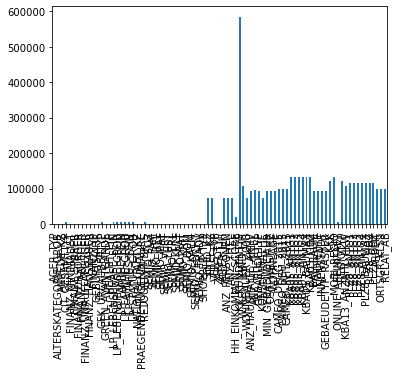

In [6]:
# Print the number of NaN in azdias
print('The number of NaN data before any converstion:',azdias.isna().sum().sum())
azdias.isna().sum().plot(kind='bar')

In [7]:
# Identify missing or unknown data values and convert them to NaNs.
feat_info['missing_or_unknown'].value_counts()

[-1]        26
[-1,9]      17
[-1,0]      16
[0]         12
[]          10
[-1,0,9]     1
[-1,X]       1
[XX]         1
[-1,XX]      1
Name: missing_or_unknown, dtype: int64

In [8]:
# convert X into 'X'
feat_info['missing_or_unknown'] = feat_info['missing_or_unknown'].replace("[-1,X]","[-1,'X']")
feat_info['missing_or_unknown'] = feat_info['missing_or_unknown'].replace("[XX]","['XX']")
feat_info['missing_or_unknown'] = feat_info['missing_or_unknown'].replace("[-1,XX]","[-1,'XX']")
feat_info['missing_or_unknown'].value_counts()

[-1]         26
[-1,9]       17
[-1,0]       16
[0]          12
[]           10
[-1,0,9]      1
[-1,'X']      1
['XX']        1
[-1,'XX']     1
Name: missing_or_unknown, dtype: int64

In [9]:
# Preview the attribute with [] as missing value
feat_info[feat_info['missing_or_unknown'] == '[]']

,attribute,information_level,type,missing_or_unknown,dtypes
12,GFK_URLAUBERTYP,person,categorical,[],float64
13,GREEN_AVANTGARDE,person,categorical,[],int64
44,ANZ_PERSONEN,household,numeric,[],float64
45,ANZ_TITEL,household,numeric,[],float64
51,ANZ_HH_TITEL,building,numeric,[],float64
53,KONSUMNAEHE,building,ordinal,[],float64
69,GEBAEUDETYP_RASTER,region_rr1,ordinal,[],float64
71,MOBI_REGIO,region_rr1,ordinal,[],float64
72,ONLINE_AFFINITAET,region_rr1,ordinal,[],float64
74,KBA13_ANZAHL_PKW,macrocell_plz8,numeric,[],float64


In [10]:
sum(azdias['ONLINE_AFFINITAET'].isna())

4854

In [11]:
# Define a function to convert string representaion of list into Python list

# library to make conversion
import ast

# This function accepts string representation of a list, converts it,
# and finally output a Python list
def convert_string_rep_of_list_to_list(input_str):
    output_list = ast.literal_eval(input_str)
    return output_list


In [ ]:
azdias['CAMEO_DEUG_2015'].value_counts()

8    134441
9    108177
6    105874
4    103912
3     86779
2     83231
7     77933
5     55310
1     36212
X       373
Name: CAMEO_DEUG_2015, dtype: int64

In [12]:
replaced_list = convert_string_rep_of_list_to_list("[-1,'X']")
azdias['CAMEO_DEUG_2015'].replace(to_replace=replaced_list,value=[np.nan,np.nan]).value_counts()

8    134441
9    108177
6    105874
4    103912
3     86779
2     83231
7     77933
5     55310
1     36212
Name: CAMEO_DEUG_2015, dtype: int64

In [13]:
for col in azdias.columns:
    # get the characters that symbolize missing value (still represented as Python string)
    missing_as_string = feat_info.set_index(keys=['attribute']).loc[col,'missing_or_unknown']
    
    # convert the list of missing value from Python string into Python list
    missing_as_list = convert_string_rep_of_list_to_list(missing_as_string)
    
    # replace the missing values into Numpy NaN
    # if the missing_or_unknown value for feat_info is not equal to "[]", i.e. list member equal to 0
    if len(missing_as_list) >= 1:
        azdias[col].replace(to_replace=missing_as_list,value=np.nan,inplace=True)
    

In [14]:
import sys

print(sys.getsizeof(azdias))
print(sys.getsizeof(feat_info))
#print(sys.getsizeof(missing_data_lookup))

775687058
31134


The number of NaN data after the converstion: 8373929


<AxesSubplot:>

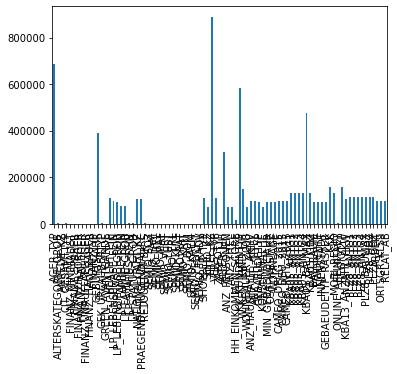

In [15]:
# Print the number of NaN in azdias
print('The number of NaN data after the converstion:',azdias.isna().sum().sum())
azdias.isna().sum().plot(kind='bar')

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [16]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.
azdias_missing = pd.DataFrame(azdias.isna().sum(), columns=['count_missing'])
azdias_missing['ratio_missing'] = azdias_missing['count_missing']/azdias.shape[0]
azdias_missing = azdias_missing.join(feat_info.set_index(['attribute']))
azdias_missing.drop(['dtypes','missing_or_unknown','type'], axis=1, inplace=True)
azdias_missing.sort_values(by=['ratio_missing'], ascending=False, inplace=True)
azdias_missing.head(40)

,count_missing,ratio_missing,information_level
TITEL_KZ,889061,0.997576,person
AGER_TYP,685843,0.769554,person
KK_KUNDENTYP,584612,0.655967,household
KBA05_BAUMAX,476524,0.534687,microcell_rr3
GEBURTSJAHR,392318,0.440203,person
ALTER_HH,310267,0.348137,household
KKK,158064,0.177357,region_rr1
REGIOTYP,158064,0.177357,region_rr1
W_KEIT_KIND_HH,147988,0.166051,household
KBA05_ANTG1,133324,0.149597,microcell_rr3


In the result above, we can see that the count of missing values in 'microcell_rr3' or 'macrocell_plz8' are exactly the same. This implies that there are some rows with NaN within that "information level", and these rows should be dropped (will be done in next section, 1.1.3). But for now, I am going to remove columns with missing value more than 20%.

The reason of 20% is because there is a large gap of missing ratio between ALTER_HH (34.8%) and KKK (17.7%), and 20% is between them. As another proof, the histogram plot also suggests that dropping columns with >20% of missing values still retain about 80% of data. 

Text(0, 0.5, 'Number of columns')

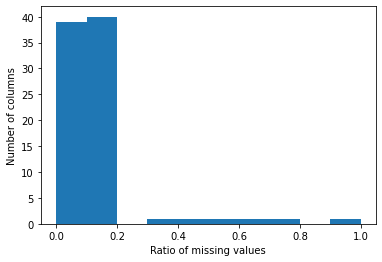

In [19]:
# Plot histogram of missing value vs number of column.
plt.hist(azdias_missing['ratio_missing'])
plt.xlabel('Ratio of missing values')
plt.ylabel('Number of columns')

In [20]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
missing_threshold = 0.2
cols_to_drop = azdias_missing[azdias_missing['ratio_missing'] > missing_threshold].index

print('from {0} columns, will drop {1}'.format(azdias.shape[1], len(cols_to_drop)))
azdias = azdias.drop(cols_to_drop, axis=1)
print('droped {0} columns, the remaining is {1} columns'.format(len(cols_to_drop), azdias.shape[1]))

from 85 columns, will drop 6
droped 6 columns, the remaining is 79 columns


In [21]:
print("columns dropped: ", cols_to_drop.values)

columns dropped:  ['TITEL_KZ' 'AGER_TYP' 'KK_KUNDENTYP' 'KBA05_BAUMAX' 'GEBURTSJAHR'
 'ALTER_HH']


#### Discussion 1.1.2: Assess Missing Data in Each Column
*(Double click this cell and replace this text with your own text, reporting your observations regarding the amount of missing data in each column. Are there any patterns in missing values? Which columns were removed from the dataset?)*

There are 6 columns with NaN ratio above 20% that I dropped. These columns are 'TITEL_KZ' 'AGER_TYP' 'KK_KUNDENTYP' 'KBA05_BAUMAX' 'GEBURTSJAHR' 'ALTER_HH'. I plan to replace the NaN data with the mode. Since replacing too many items may distort the data, I set a threshold of 20% to decide whether keeping a column or dropping it.

I found that 40% of columns have almost none of missing data, 50% of columns have 10ish% of NaN, while the rest of 10% data have 20+% of NaN. And the columns with 10ish% of missing data belong to the same "information level". Perhaps there is a systematic error when collecting the data (in this case a whole row may be dropped later).

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

dataset size (rows,cols):  (891221, 79)


Text(0, 0.5, 'number of rows')

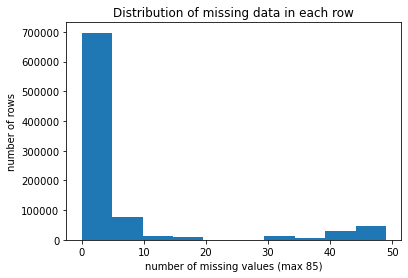

In [25]:
# How much data is missing in each row of the dataset?
print("dataset size (rows,cols): ", azdias.shape)
azdias_missing_row = azdias.isna().sum(axis=1)
plt.hist(azdias_missing_row)
plt.title('Distribution of missing data in each row')
plt.xlabel('number of missing values (max 85)')
plt.ylabel('number of rows')

In [26]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
missing_row_threshold = 20
lo_miss = azdias_missing_row[azdias_missing_row < missing_row_threshold]
hi_miss = azdias_missing_row[azdias_missing_row >= missing_row_threshold]
azdias_lo_miss = azdias.iloc[lo_miss.index,:]
azdias_hi_miss = azdias.iloc[hi_miss.index,:]

print('the size of data subset with low and high number of missing values in each row')
print(' -  low missing value subset: ', azdias_lo_miss.shape)
print(' - high missing value subset: ', azdias_hi_miss.shape)

the size of data subset with low and high number of missing values in each row
 -  low missing value subset:  (797077, 79)
 - high missing value subset:  (94144, 79)


In [27]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.
import seaborn as sns

def plot_comparison_of_missing_val_in_row(column_name, axes, axes_row_idx):
    sns.countplot(x=column_name, data=azdias_lo_miss, ax=axes[axes_row_idx,0])
    axes[axes_row_idx,0].set_title('low missing value - ' + column_name)

    sns.countplot(x=column_name, data=azdias_hi_miss, ax=axes[axes_row_idx,1])
    axes[axes_row_idx,1].set_title('high missing value - ' + column_name)

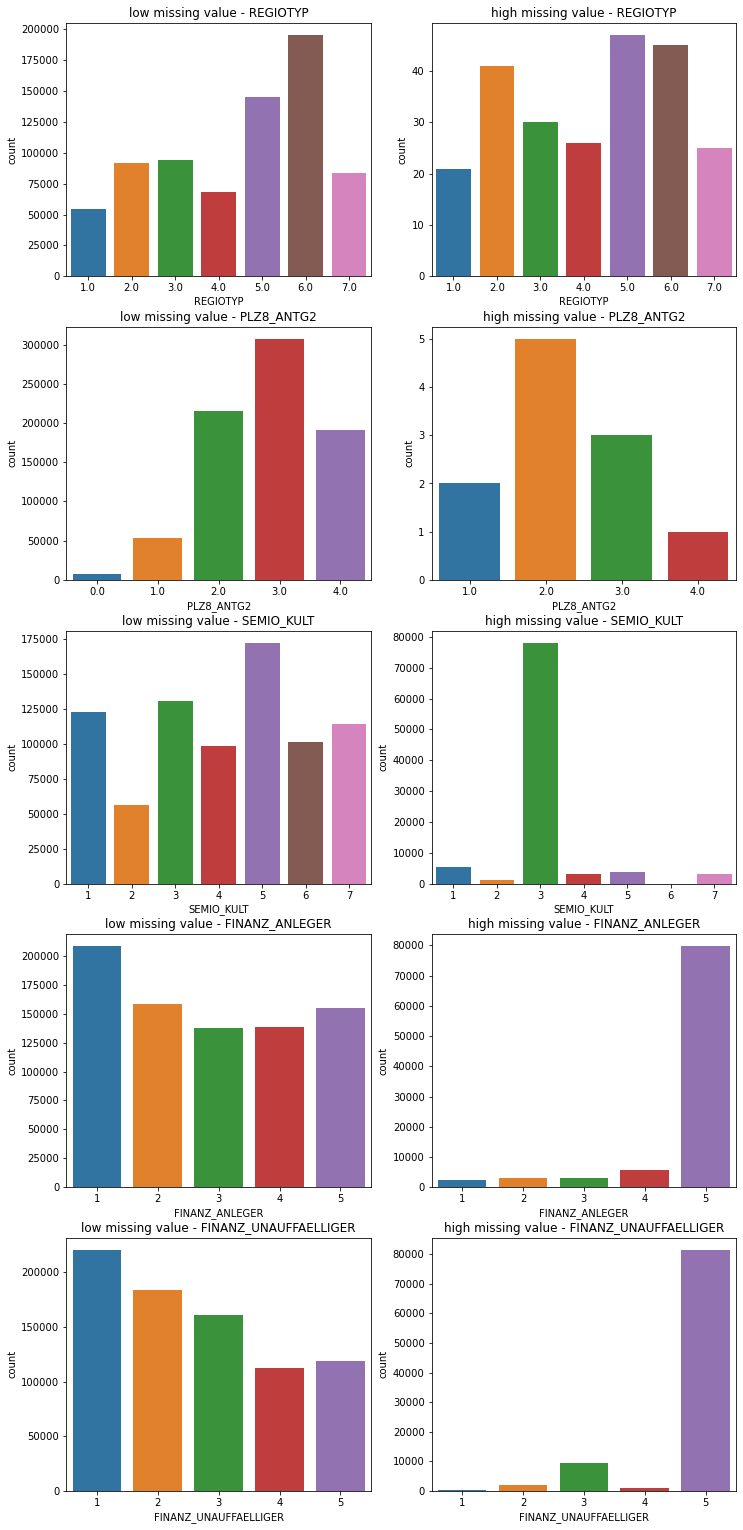

In [28]:
# Randomly take 5 columns to investigate
col_idx = np.random.randint(low=0, high=azdias.shape[1], size=(5))
columns_to_inspect = azdias.columns[col_idx]

# Prepare subplot
fig,axes = plt.subplots(5, 2, figsize=(12,27))

# Iterate the plotting using seaborn countplot
for (i, col_name) in enumerate(columns_to_inspect):
    plot_comparison_of_missing_val_in_row(column_name=col_name, axes=axes, axes_row_idx=i)

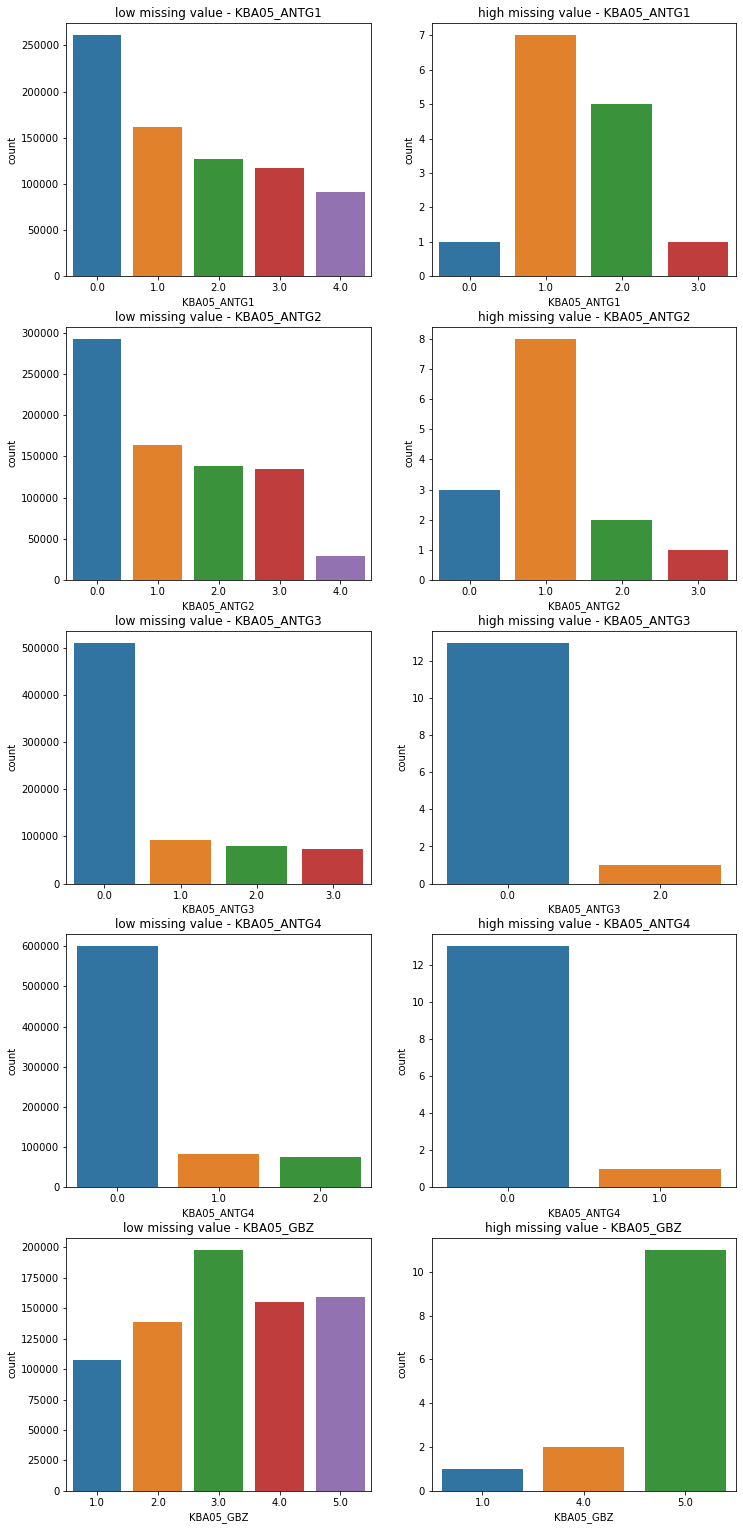

In [29]:
# Inspect columns in microcell_rr3
columns_to_inspect = ['KBA05_ANTG1', 'KBA05_ANTG2', 'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_GBZ']

# Prepare subplot
fig,axes = plt.subplots(5, 2, figsize=(12,27))

# Iterate the plotting using seaborn countplot
for (i, col_name) in enumerate(columns_to_inspect):
    plot_comparison_of_missing_val_in_row(column_name=col_name, axes=axes, axes_row_idx=i)

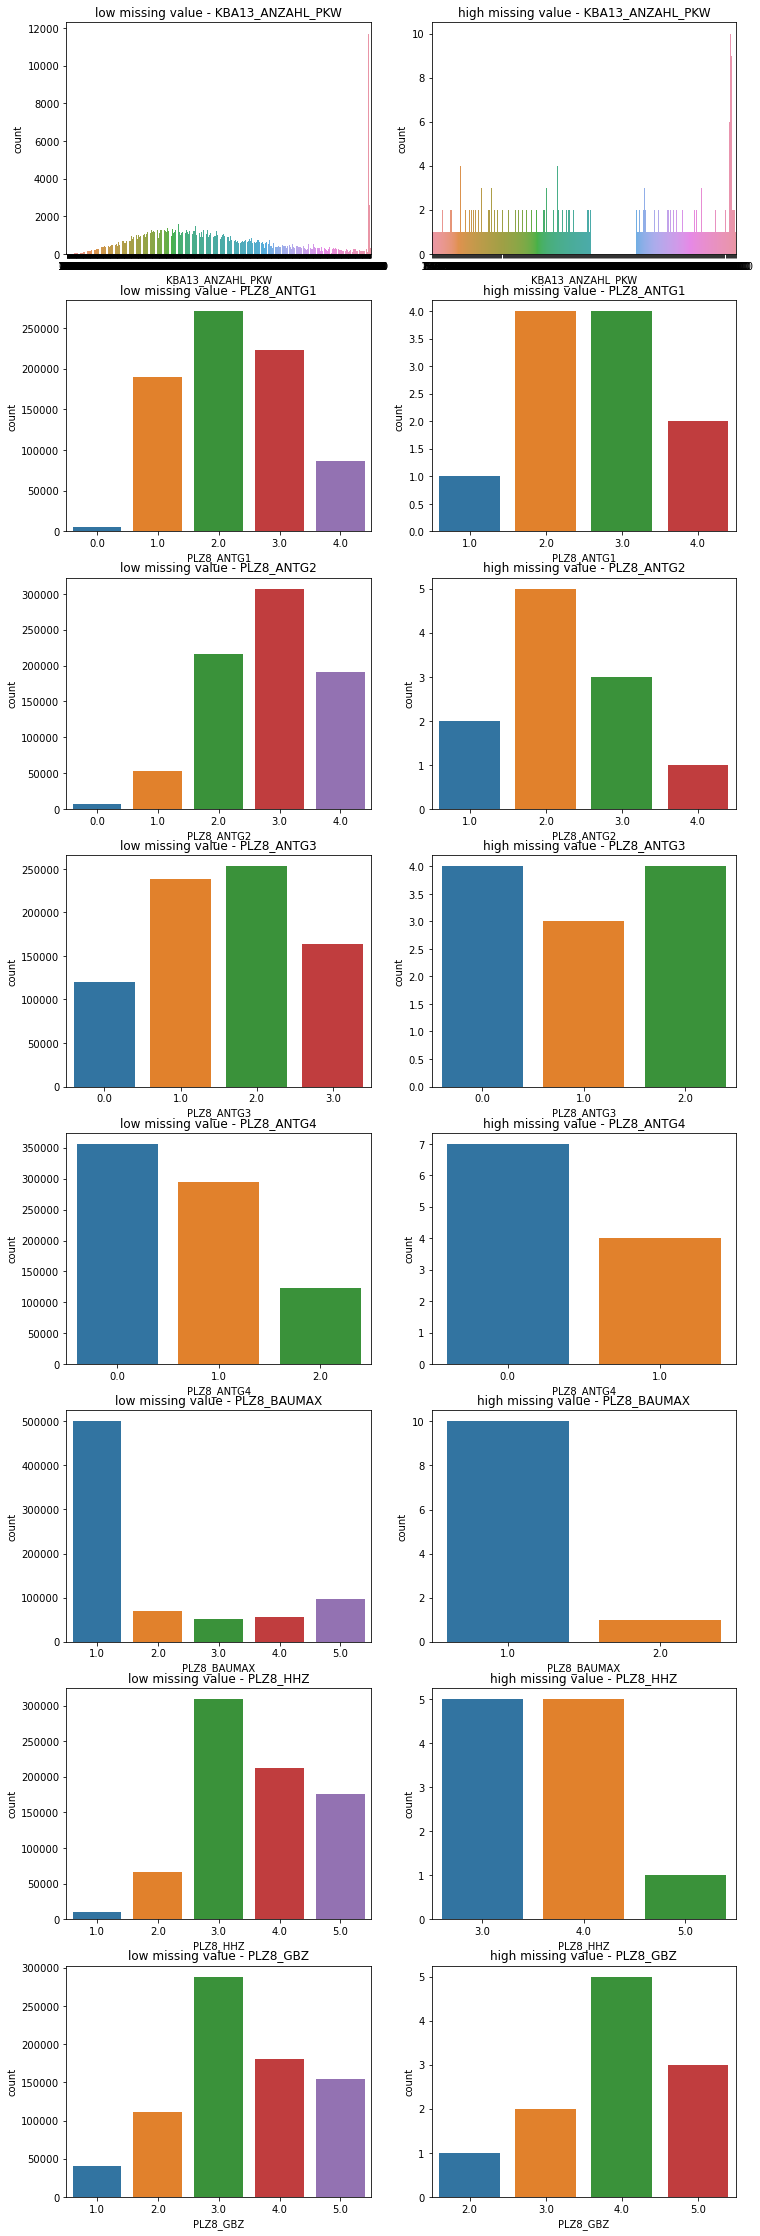

In [30]:
# Inspect columns in macrocell_plz8
columns_to_inspect = ['KBA13_ANZAHL_PKW', 'PLZ8_ANTG1', 'PLZ8_ANTG2', 'PLZ8_ANTG3', 'PLZ8_ANTG4', 'PLZ8_BAUMAX', 'PLZ8_HHZ', 'PLZ8_GBZ']

# Prepare subplot
fig,axes = plt.subplots(8, 2, figsize=(12,40))

# Iterate the plotting using seaborn countplot
for (i, col_name) in enumerate(columns_to_inspect):
    plot_comparison_of_missing_val_in_row(column_name=col_name, axes=axes, axes_row_idx=i)

#### Discussion 1.1.3: Assess Missing Data in Each Row
*Assessing the missing data in each row concludes that rows with high number of missing value **should be dropped**. Justification:*
1. *The shape/distribution between low and high missing value subset are similar.*
2. *In some columns, like `macrocell_plz8` or `microcell_rr3`, the amount of missing values are really high. For example, there are over 90,000 rows in high-missing-data subset, however the number of rows with data is only less than 50 in this subset. In other words, the high-missing-data subset has too few data points in `macrocell_plz8` or `microcell_rr3`, which cause us unable to analyze these categories.*

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [31]:
# How many features are there of each data type?
feat_info_after_coldrop = feat_info[feat_info['attribute'].isin(cols_to_drop.values) == False]
feat_info_after_coldrop.drop(['information_level','missing_or_unknown'], axis=1).groupby(by=['type','dtypes']).count()

attribute
type        dtypes            
categorical int64            7
            float64          8
            object           3
mixed       int64            1
            float64          4
            object           1
numeric     float64          6
ordinal     int64           22
            float64         27

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [32]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

# First, copy the feat_info df into a new dataframe, then remove the rows
# which the 'attribute' value has been dropped in Step 1.1.2 (missing data analysis by column)
categorical_var_df = feat_info[feat_info['type'] == 'categorical'].copy()
categorical_var_df = categorical_var_df[categorical_var_df['attribute'].isin(cols_to_drop.values) == False]

# Second, create a function to count the number of categories (possible values) in that variable.
def count_num_of_category(attribute_name, input_df):
    return len(input_df[attribute_name].value_counts())

# Third, create a new column in categorical_var_df to hold the number of categories
# in the corresponding categorical variable
categorical_var_df['num_of_categories'] = categorical_var_df['attribute'].apply(func= count_num_of_category, input_df=azdias)
categorical_var_df

,attribute,information_level,type,missing_or_unknown,dtypes,num_of_categories
2,ANREDE_KZ,person,categorical,"[-1,0]",int64,2
3,CJT_GESAMTTYP,person,categorical,[0],float64,6
10,FINANZTYP,person,categorical,[-1],int64,6
12,GFK_URLAUBERTYP,person,categorical,[],float64,12
13,GREEN_AVANTGARDE,person,categorical,[],int64,2
17,LP_FAMILIE_FEIN,person,categorical,[0],float64,11
18,LP_FAMILIE_GROB,person,categorical,[0],float64,5
19,LP_STATUS_FEIN,person,categorical,[0],float64,10
20,LP_STATUS_GROB,person,categorical,[0],float64,5
21,NATIONALITAET_KZ,person,categorical,"[-1,0]",int64,3


In [33]:
# Drop unnecessary categorical columns based on the table in Discussion 1.2.1.
categorical_cols_to_drop = ['FINANZTYP','LP_FAMILIE_FEIN','LP_STATUS_FEIN','CAMEO_DEUG_2015','CAMEO_DEU_2015']
print('from {0} columns, will drop {1}'.format(azdias.shape[1], len(categorical_cols_to_drop)))

azdias = azdias.drop(categorical_cols_to_drop, axis=1)
print('from {0} columns, the remaining is {1} columns'.format(len(categorical_cols_to_drop), azdias.shape[1]))

from 79 columns, will drop 5
from 5 columns, the remaining is 74 columns


In [34]:
# Replace values in column GEBAEUDETYP
# 1-2 -> res (residential)
# 3-8 -> non_res (mixed, company)
azdias['GEBAEUDETYP'] = azdias['GEBAEUDETYP'].replace(to_replace=[1, 2], value='res')
azdias['GEBAEUDETYP'] = azdias['GEBAEUDETYP'].replace(to_replace=[3, 4, 5, 6, 7, 8], value='non_res')


In [35]:
# Re-encode categorical variable(s) to be kept in the analysis.
# use One Hot Encoding (OHE)
cols_to_ohe = ['CJT_GESAMTTYP','GFK_URLAUBERTYP','LP_FAMILIE_GROB','LP_STATUS_GROB','NATIONALITAET_KZ','SHOPPER_TYP','ZABEOTYP','GEBAEUDETYP','OST_WEST_KZ']
azdias = pd.get_dummies(data=azdias,
                prefix=cols_to_ohe,
                columns=cols_to_ohe,
                drop_first=True)
azdias.columns.values

array(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'FINANZ_MINIMALIST',
       'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER',
       'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'GREEN_AVANTGARDE',
       'HEALTH_TYP', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB',
       'PRAEGENDE_JUGENDJAHRE', 'RETOURTYP_BK_S', 'SEMIO_SOZ',
       'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT', 'SEMIO_LUST',
       'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT', 'SEMIO_DOM',
       'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV', 'SOHO_KZ',
       'VERS_TYP', 'ANZ_PERSONEN', 'ANZ_TITEL', 'HH_EINKOMMEN_SCORE',
       'W_KEIT_KIND_HH', 'WOHNDAUER_2008', 'ANZ_HAUSHALTE_AKTIV',
       'ANZ_HH_TITEL', 'KONSUMNAEHE', 'MIN_GEBAEUDEJAHR', 'WOHNLAGE',
       'CAMEO_INTL_2015', 'KBA05_ANTG1', 'KBA05_ANTG2', 'KBA05_ANTG3',
       'KBA05_ANTG4', 'KBA05_GBZ', 'BALLRAUM', 'EWDICHTE', 'INNENSTADT',
       'GEBAEUDETYP_RASTER', 'KKK', 'MOBI_REGIO', 'ONLINE_AFFINITAET',
       'REGIOTYP', 'KBA13_ANZAHL_PKW',

#### Discussion 1.2.1: Re-Encode Categorical Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding categorical features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)

*Since there are only 18 categorical variables, I cherry picked the encoding strategy in each variable one by one. Below is the summary (note: OHE = one hot encoding).*

| attribute | English explanation | num_of_categories | keep or drop | comment and encoding strategy |
|-----------|---------------------|-------------------|--------------|-------------------------------|
| ANREDE_KZ | Gender | 2 | keep | binary, no change |
| CJT_GESAMTTYP | preferred information and buying channels | 6 | keep | OHE |
| FINANZTYP | financial type for individual | 6 | drop | this variable is the similar to some ordinal variables like FINANZ_MINIMALIST, FINANZ_SPARER, etc. |
| GFK_URLAUBERTYP | Vacation habits | 12 |  keep | interesting to keep, OHE |
| GREEN_AVANTGARDE | Membership in environmental sustainability | 2 |  keep | binary, no change |
| LP_FAMILIE_FEIN | Family type, fine scale | 11 |  drop | use the rough scale |
| LP_FAMILIE_GROB | Family type, rough scale | 5 |  keep | OHE |
| LP_STATUS_FEIN | Life stage, fine scale | 10 |  drop | use the rough scale |
| LP_STATUS_GROB | Life stage, rough scale | 5 |  keep | OHE | 
| NATIONALITAET_KZ | Nationality based on given name analysis | 3 |  keep | OHE | 
| SHOPPER_TYP | Shopper typology | 4 |  keep | OHE | 
| SOHO_KZ | Small office / home office flag | 2 |  keep | binary, no change | 
| VERS_TYP | Insurance typology | 2 |  keep | binary, no change | 
| ZABEOTYP | Energy consumption typology | 6 | keep | OHE | 
| GEBAEUDETYP | Type of building (residential vs. commercial) | 7 |  keep | map into binary values: residential, non residential (string); then OHE | 
| OST_WEST_KZ | Building location via former East / West Germany (GDR / FRG) | 2 |  keep | use OHE since the data type is string | 
| CAMEO_DEUG_2015 | Wealth / Life Stage Typology, rough scale | 9 | drop | will use CAMEO_INTL_2015 instead (see Step 1.2.2) | 
| CAMEO_DEU_2015 | Wealth / Life Stage Typology, fine scale | 44 | drop | will use CAMEO_INTL_2015 instead (see Step 1.2.2) |

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [36]:
feat_info_after_coldrop[feat_info_after_coldrop['type'] == 'mixed']

,attribute,information_level,type,missing_or_unknown,dtypes
15,LP_LEBENSPHASE_FEIN,person,mixed,[0],float64
16,LP_LEBENSPHASE_GROB,person,mixed,[0],float64
22,PRAEGENDE_JUGENDJAHRE,person,mixed,"[-1,0]",int64
56,WOHNLAGE,building,mixed,[-1],float64
59,CAMEO_INTL_2015,microcell_rr4,mixed,"[-1,'XX']",object
79,PLZ8_BAUMAX,macrocell_plz8,mixed,"[-1,0]",float64


##### Break `PRAEGENDE_JUGENDJAHRE`

In [37]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

# This function will break the PRAEGENDE_JUGENDJAHRE into two new variables:
# MOVE_PERIOD and IS_AVANTGARDE_MOVE
# MOVE_PERIOD interval is defined as 1: 40s, 2: 50s, ... 6: 90s
# IS_MOVE_AVANTGARDE is defined as binary 1: avantgarde, 0: mainstream
def break_praegende_jugendjahre(input_df):
    # encode the MOVEMENT_PERIOD
    input_df['MOVE_PERIOD'] = input_df['PRAEGENDE_JUGENDJAHRE']
    input_df['MOVE_PERIOD'] = input_df['MOVE_PERIOD'].replace({1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 3, 7: 3, 8: 4, 9: 4, 10: 5, 11: 5, 12: 5, 13: 5, 14: 6, 15: 6})
    
    # encode the MOVEMENT_PERIOD
    input_df['IS_MOVE_AVANTGARDE'] = input_df['PRAEGENDE_JUGENDJAHRE']
    input_df['IS_MOVE_AVANTGARDE'] = input_df['IS_MOVE_AVANTGARDE'].replace({1: 0, 2: 1, 3: 0, 4: 1, 5: 0, 6: 1, 7: 1, 8: 0, 9: 1, 10: 0, 11: 1, 12: 0, 13: 1, 14: 0, 15: 1})

    return input_df

In [38]:
# Call the function to break PRAEGENDE_JUGENDJAHRE variable, then check the result
azdias = break_praegende_jugendjahre(azdias)
azdias.loc[:,['PRAEGENDE_JUGENDJAHRE','MOVE_PERIOD','IS_MOVE_AVANTGARDE']].head()

,PRAEGENDE_JUGENDJAHRE,MOVE_PERIOD,IS_MOVE_AVANTGARDE
0,NaN,NaN,NaN
1,14.0,6.0,0.0
2,15.0,6.0,1.0
3,8.0,4.0,0.0
4,8.0,4.0,0.0


##### Break `CAMEO_INTL_2015`

In [39]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.

# This function will break the CAMEO_INTL_2015 into two new variables
# HOUSE_WEALTH and LIFE_STAGE by breaking up the 'tens' and 'ones' digit
def break_cameo_intl_2015(input_df):
    # Encode HOUSE_WEALTH by taking the first digit of CAMEO_INTL_2015
    # The fillna('00') is used to treat the NaN values (to prevent error)
    input_df['HOUSE_WEALTH'] = input_df['CAMEO_INTL_2015'].fillna('00').apply(lambda x: int(x[0]))
    input_df['HOUSE_WEALTH'] = input_df['HOUSE_WEALTH'].replace(0, np.nan) # revert back 0 to NaN again
    
    # Encode LIFE_STAGE by taking the second digit of CAMEO_INTL_2015
    # The fillna('00') is used to treat the NaN values (to prevent error)
    input_df['LIFE_STAGE'] = input_df['CAMEO_INTL_2015'].fillna('00').apply(lambda x: int(x[1]))
    input_df['LIFE_STAGE'] = input_df['LIFE_STAGE'].replace(0, np.nan) # revert back 0 to NaN again

    return input_df

In [40]:
# Call the function to break CAMEO_INTL_2015 variable, then check the result
azdias = break_cameo_intl_2015(azdias)
azdias.loc[:,['CAMEO_INTL_2015','HOUSE_WEALTH','LIFE_STAGE']].head()

,CAMEO_INTL_2015,HOUSE_WEALTH,LIFE_STAGE
0,NaN,NaN,NaN
1,51,5.0,1.0
2,24,2.0,4.0
3,12,1.0,2.0
4,43,4.0,3.0


##### Drop `LP_LEBENSPHASE_FEIN` and `LP_LEBENSPHASE_GROB`

In [41]:
# Drop unnecessary mixed categorical columns
mixed_categorical_cols_to_drop = ['LP_LEBENSPHASE_FEIN','LP_LEBENSPHASE_GROB']
print('From {0} columns, will drop {1}'.format(azdias.shape[1], len(mixed_categorical_cols_to_drop)))

azdias = azdias.drop(mixed_categorical_cols_to_drop, axis=1)
print('Dropped {0} columns, the remaining is {1} columns'.format(len(mixed_categorical_cols_to_drop), azdias.shape[1]))

From 105 columns, will drop 2
Dropped 2 columns, the remaining is 103 columns


##### Break `WOHNLAGE`

In [42]:
# This function will break the WOHNLAGE into two new variables
# NEIGHBORHOOD_QLY and IS_RURAL
def break_wohnlage(input_df):
    # Encode NEIGHBORHOOD_QLY by replacing WOHNLAGE equal to 7 or 8 into 3.
    input_df['NEIGHBORHOOD_QLY'] = input_df['WOHNLAGE'].replace(to_replace=[7, 8], value=3)
    
    # If WOHNLAGE equal to 1-5, encode to IS_RURAL = 0, 
    # else if WOHNLAGE equal to 7-8, IS_RURAL = 1.
    input_df['IS_RURAL'] = input_df['WOHNLAGE']
    input_df['IS_RURAL'] = input_df['IS_RURAL'].replace(to_replace=[1, 2, 3, 4, 5], value=0)
    input_df['IS_RURAL'] = input_df['IS_RURAL'].replace(to_replace=[7, 8], value=1)

    return input_df

In [43]:
# Call the function to break WOHNLAGE variable, then check the result
azdias = break_wohnlage(azdias)
azdias.loc[:,['WOHNLAGE','NEIGHBORHOOD_QLY','IS_RURAL']].head()

,WOHNLAGE,NEIGHBORHOOD_QLY,IS_RURAL
0,NaN,NaN,NaN
1,4.0,4.0,0.0
2,2.0,2.0,0.0
3,7.0,3.0,1.0
4,3.0,3.0,0.0


##### Create `PLZ8_IS_BUSINESS` from `PLZ8_BAUMAX`

In [44]:
# This function will convert PLZ8_BAUMAX into a new variable called PLZ8_IS_BUSINESS.
# PLZ8_IS_BUSINESS flags whether the most common building in PLZ8 area is business building or not.
def convert_plz8_baumax(input_df):
    # If PLZ8_BAUMAX equal to 1-4, encode to PLZ8_IS_BUSINESS = 0, 
    # else if PLZ8_BAUMAX equal to 5, PLZ8_IS_BUSINESS = 1.
    input_df['PLZ8_IS_BUSINESS'] = input_df['PLZ8_BAUMAX']
    input_df['PLZ8_IS_BUSINESS'] = input_df['PLZ8_IS_BUSINESS'].replace(to_replace=[1, 2, 3, 4], value=0)
    input_df['PLZ8_IS_BUSINESS'] = input_df['PLZ8_IS_BUSINESS'].replace(to_replace=5, value=1)

    return input_df

In [45]:
# Call the function to convert PLZ8_BAUMAX variable, then check the result
azdias = convert_plz8_baumax(azdias)
azdias.loc[:,['PLZ8_BAUMAX','PLZ8_IS_BUSINESS']].head()

,PLZ8_BAUMAX,PLZ8_IS_BUSINESS
0,NaN,NaN
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,2.0,0.0


#### Discussion 1.2.2: Engineer Mixed-Type Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding mixed-value features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)

*Below is the encoding strategy for mixed-type features*

| attribute | English explanation | action | comment and encoding strategy |
|-----------|---------------------|--------|-------------------------------|
| LP_LEBENSPHASE_FEIN | Life stage, fine scale | drop | this variable can be representated by LP_FAMILIE_GROB and LP_STATUS_GROB |
| LP_LEBENSPHASE_GROB | Life stage, rough scale information and buying channels | drop | this variable can be representated by LP_FAMILIE_GROB and LP_STATUS_GROB |
| WOHNLAGE | Neighborhood quality (or rural flag) |  break | break into 2 new columns: neighborhood quality and rural flag. For encoding details see explanation below. |
| PLZ8_BAUMAX | Most common building type within the PLZ8 region | change | Change the interpretation to be "flag whether the most common building type is business buildings or not". The PLZ8_BAUMAX with value of 1-4 is already representated by variable PLZ8_ANTG1, PLZ8_ANTG2, PLZ8_ANTG3, PLZ8_ANTG4, thus we can disregard the information about family-homes and focus whether the most common building is business or not. For encoding details see explanation below. |


*WOHNLAGE is broken down into 2 new features: NEIGHBORHOOD_QLY and IS_RURAL. The encoding is summarized in table below. Basically the rule is like this*
- *NEIGHBORHOOD_QLY: WOHNLAGE value if it is within range 1-5. When the neighborhood is rural, treat it as having average neighborhood quality (value equal to 3).*
- *IS_RURAL: set the value as 1 if WOHNLAGE value is equal to 7 or 8, otherwise 0.* 

| WOHNLAGE value | NEIGHBORHOOD_QLY | IS_RURAL |
|----------------|------------------|----------|
| -1,0 | np.NaN | np.NaN |
| 1 | 1 | 0 |
| 2 | 2 | 0 |
| 3 | 3 | 0 |
| 4 | 4 | 0 |
| 5 | 5 | 0 |
| 7 | 3 | 1 |
| 8 | 3 | 1 |


*PLZ8_BAUMAX is replaced with a new feature called PLZ8_IS_BUSINESS. Basically this feature flags whether the most common building in PLZ8 area is business building or not. The encoding is summarized in table below.*
| PLZ8_BAUMAX value | PLZ8_IS_BUSINESS |
|-------------------|------------------|
| -1,0 | np.NaN |
| 1 | 0 |
| 2 | 0 |
| 3 | 0 |
| 4 | 0 |
| 5 | 1 |

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [46]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)

# Get the subset of data with "few or no missing values"
# This can be done by dropping the rows (index) with high missing values (STEP 1.1.3)
azdias = azdias.drop(index=azdias_hi_miss.index)

# Drop some columns that we have broken down, e.g. PRAEGENDE_JUGENDJAHRE
# Drop unnecessary mixed categorical columns
broken_down_cols_to_drop = ['PRAEGENDE_JUGENDJAHRE','CAMEO_INTL_2015','WOHNLAGE','PLZ8_BAUMAX']
azdias = azdias.drop(broken_down_cols_to_drop, axis=1)

In [47]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

# Check the remaining columns and the data type
dtype_df = pd.DataFrame(azdias.dtypes,index=azdias.dtypes.index,columns=['dtypes'])
print('azdias dataframe has shape:', azdias.shape)
print('and the datatype as following:')
dtype_df['dtypes'].value_counts()

azdias dataframe has shape: (797077, 102)
and the datatype as following:


float64    44
uint8      36
int64      22
Name: dtypes, dtype: int64

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [4]:
# Library to make conversion
import ast

# Subfunction to convert string representaion of list into Python list
def convert_string_rep_of_list_to_list(input_str):
    """
    This function accepts string representation of a list, converts it,
    and finally output a Python list

    INPUT: string representation of Python list "[a,b,c]"
    OUTPUT: Python list [a,b,c]
    """
    output_list = ast.literal_eval(input_str)
    return output_list

# Subfunction to drop columns with large number of missing values
def drop_cols_with_lot_of_nan(input_df, threshold_ratio):
    """
    This function drops columns with the number of NaN value more than
    the threshold ratio

    INPUT: 
    1) input_df - the dataframe
    2) threshold_ratio - column with missing value ratio larger than this will be dropped
    OUTPUT: the dataframe after column is cleaned
    """
    df_missing_col = input_df.isna().sum(axis=0)/input_df.shape[0] > threshold_ratio
    cols_to_drop = df_missing_col[df_missing_col == True].index
    input_df = input_df.drop(columns=cols_to_drop)
    return input_df

# Subfunction to drop columns with large number of missing values (column names hardcoded)
def drop_cols_with_lot_of_nan_hardcode(input_df):
    """
    This function drops predetermined columns. The column names is decided based on
    the number of NaN value more than 20% in azdias country dataset.

    INPUT: input_df - the dataframe
    OUTPUT: the dataframe after column is cleaned
    """
    cols_to_drop = ['TITEL_KZ','AGER_TYP','KK_KUNDENTYP','KBA05_BAUMAX','GEBURTSJAHR','ALTER_HH']
    input_df = input_df.drop(columns=cols_to_drop)
    return input_df

# Subfunction to drop rows with large number of missing values
def drop_rows_with_lot_of_nan(input_df, threshold_value):
    """
    This function drops rows with the number of NaN value more than
    the threshold value

    INPUT: 
    1) input_df - the dataframe
    2) threshold value - rows with missing value larger than this will be dropped
    OUTPUT: the dataframe after row is cleaned
    """
    df_missing_row = input_df.isna().sum(axis=1)
    hi_miss = df_missing_row[df_missing_row >= threshold_value]
    input_df = input_df.drop(index=hi_miss.index)
    return input_df

# Subfunction to break the PRAEGENDE_JUGENDJAHRE into two new variables
def break_praegende_jugendjahre(input_df):
    """
    This function will break the PRAEGENDE_JUGENDJAHRE into two new variables:
    MOVE_PERIOD and IS_AVANTGARDE_MOVE
    MOVE_PERIOD interval is defined as 1: 40s, 2: 50s, ... 6: 90s
    IS_MOVE_AVANTGARDE is defined as binary 1: avantgarde, 0: mainstream

    INPUT: main dataframe with PRAEGENDE_JUGENDJAHRE variable
    OUTPUT: dataframe after PRAEGENDE_JUGENDJAHRE variable has been converted
    """
    # encode the MOVEMENT_PERIOD
    input_df['MOVE_PERIOD'] = input_df['PRAEGENDE_JUGENDJAHRE']
    input_df['MOVE_PERIOD'] = input_df['MOVE_PERIOD'].replace({1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 3, 7: 3, 8: 4, 9: 4, 10: 5, 11: 5, 12: 5, 13: 5, 14: 6, 15: 6})
    
    # encode the MOVEMENT_PERIOD
    input_df['IS_MOVE_AVANTGARDE'] = input_df['PRAEGENDE_JUGENDJAHRE']
    input_df['IS_MOVE_AVANTGARDE'] = input_df['IS_MOVE_AVANTGARDE'].replace({1: 0, 2: 1, 3: 0, 4: 1, 5: 0, 6: 1, 7: 1, 8: 0, 9: 1, 10: 0, 11: 1, 12: 0, 13: 1, 14: 0, 15: 1})
    
    return input_df

# Subfunction to break the CAMEO_INTL_2015 into two new variables
def break_cameo_intl_2015(input_df):
    """
    This function will break the CAMEO_INTL_2015 into two new variables
    HOUSE_WEALTH and LIFE_STAGE by breaking up the 'tens' and 'ones' digit

    INPUT: main dataframe with CAMEO_INTL_2015 variable
    OUTPUT: dataframe after CAMEO_INTL_2015 variable has been converted
    """
    # Encode HOUSE_WEALTH by taking the first digit of CAMEO_INTL_2015
    # The fillna('00') is used to treat the NaN values (to prevent error)
    input_df['HOUSE_WEALTH'] = input_df['CAMEO_INTL_2015'].fillna('00').apply(lambda x: int(x[0]))
    input_df['HOUSE_WEALTH'] = input_df['HOUSE_WEALTH'].replace(0, np.nan) # revert back 0 to NaN again
    
    # Encode LIFE_STAGE by taking the second digit of CAMEO_INTL_2015
    # The fillna('00') is used to treat the NaN values (to prevent error)
    input_df['LIFE_STAGE'] = input_df['CAMEO_INTL_2015'].fillna('00').apply(lambda x: int(x[1]))
    input_df['LIFE_STAGE'] = input_df['LIFE_STAGE'].replace(0, np.nan) # revert back 0 to NaN again

    return input_df

# Subfunction to break the WOHNLAGE into two new variables
def break_wohnlage(input_df):
    """
    This function will break the WOHNLAGE into two new variables
    NEIGHBORHOOD_QLY and IS_RURAL

    INPUT: main dataframe with WOHNLAGE variable
    OUTPUT: dataframe after WOHNLAGE variable has been converted
    """
    # Encode NEIGHBORHOOD_QLY by replacing WOHNLAGE equal to 7 or 8 into 3.
    input_df['NEIGHBORHOOD_QLY'] = input_df['WOHNLAGE'].replace(to_replace=[7, 8], value=3)
    
    # If WOHNLAGE equal to 1-5, encode to IS_RURAL = 0, 
    # else if WOHNLAGE equal to 7-8, IS_RURAL = 1.
    input_df['IS_RURAL'] = input_df['WOHNLAGE']
    input_df['IS_RURAL'] = input_df['IS_RURAL'].replace(to_replace=[1, 2, 3, 4, 5], value=0)
    input_df['IS_RURAL'] = input_df['IS_RURAL'].replace(to_replace=[7, 8], value=1)

    return input_df

# Subfunction to convert PLZ8_BAUMAX into a new variable called PLZ8_IS_BUSINESS.
def convert_plz8_baumax(input_df):
    """
    This function will convert PLZ8_BAUMAX into a new variable called PLZ8_IS_BUSINESS.
    PLZ8_IS_BUSINESS flags whether the most common building in PLZ8 area is business building or not.

    INPUT: main dataframe with PLZ8_IS_BUSINESS variable
    OUTPUT: dataframe with PLZ8_IS_BUSINESS added into it
    """
    # If PLZ8_BAUMAX equal to 1-4, encode to PLZ8_IS_BUSINESS = 0, 
    # else if PLZ8_BAUMAX equal to 5, PLZ8_IS_BUSINESS = 1.
    input_df['PLZ8_IS_BUSINESS'] = input_df['PLZ8_BAUMAX']
    input_df['PLZ8_IS_BUSINESS'] = input_df['PLZ8_IS_BUSINESS'].replace(to_replace=[1, 2, 3, 4], value=0)
    input_df['PLZ8_IS_BUSINESS'] = input_df['PLZ8_IS_BUSINESS'].replace(to_replace=5, value=1)

    return input_df

# Subfunction to drop unnecessary mixed-type variables
def drop_unnecessary_mixed_cols(input_df):
    """
    This function will drop unnecessary mixed-type variables, specifically
    variables with redundant info and variables that already been broken down

    INPUT: main dataframe with CAMEO_INTL_2015 variable
    OUTPUT: dataframe after CAMEO_INTL_2015 variable has been converted and dropped
    """
    # Drop unnecessary mixed categorical columns
    mixed_type_cols_to_drop = ['PRAEGENDE_JUGENDJAHRE','CAMEO_INTL_2015','WOHNLAGE','PLZ8_BAUMAX','LP_LEBENSPHASE_FEIN','LP_LEBENSPHASE_GROB']
    input_df = input_df.drop(mixed_type_cols_to_drop, axis=1)
    return input_df


In [5]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # PART 1/4 - Convert missing values into NaN
    feature_info = feat_info
    feature_info['missing_or_unknown'] = feature_info['missing_or_unknown'].replace({"[-1,X]":"[-1,'X']","[XX]":"['XX']","[-1,XX]":"[-1,'XX']"})
    for col in df.columns:
        # get the characters that symbolize missing value (still represented as Python string)
        missing_as_string = feature_info.set_index(keys=['attribute']).loc[col,'missing_or_unknown']
        
        # convert the list of missing value from Python string into Python list
        missing_as_list = convert_string_rep_of_list_to_list(missing_as_string)
        
        # replace the missing values into Numpy NaN
        # if the missing_or_unknown value for feat_info is not equal to "[]", i.e. list member equal to 0
        if len(missing_as_list) >= 1:
            df[col].replace(to_replace=missing_as_list,value=[np.nan]*len(missing_as_list),inplace=True)
    
    # PART 2/4 - Remove rows and columns based on number of missing values
    # Remove some columns based on number of missing values
    #df = drop_cols_with_lot_of_nan(df, threshold_ratio=0.2)
    df = drop_cols_with_lot_of_nan_hardcode(df)

    ## Remove some rows based on number of missing values
    df = drop_rows_with_lot_of_nan(df,threshold_value=20)

    # PART 3/4 - Engineer/Re-encode categorical variables
    # Drop unnecessary categorical columns based on the table in Discussion 1.2.1.
    categorical_cols_to_drop = ['FINANZTYP','LP_FAMILIE_FEIN','LP_STATUS_FEIN','CAMEO_DEUG_2015','CAMEO_DEU_2015']
    for col in categorical_cols_to_drop:
        if col in df.columns:
            df = df.drop(col, axis=1)
    
    # Replace values in column GEBAEUDETYP
    df['GEBAEUDETYP'] = df['GEBAEUDETYP'].replace(to_replace=[1, 2], value='res')
    df['GEBAEUDETYP'] = df['GEBAEUDETYP'].replace(to_replace=[3, 4, 5, 6, 7, 8], value='non_res')
    
    # Perform one hot encoding for selected categorical variable(s)
    cols_to_ohe = ['CJT_GESAMTTYP','GFK_URLAUBERTYP','LP_FAMILIE_GROB','LP_STATUS_GROB','NATIONALITAET_KZ','SHOPPER_TYP','ZABEOTYP','GEBAEUDETYP','OST_WEST_KZ']
    df = pd.get_dummies(data=df,
                    prefix=cols_to_ohe,
                    columns=cols_to_ohe,
                    drop_first=True)
    
    # PART 4/4 - Perform feature engineering/encoding for mixed-type variables
    df = break_praegende_jugendjahre(df)
    df = break_cameo_intl_2015(df)
    df = break_wohnlage(df)
    df = convert_plz8_baumax(df)
    df = drop_unnecessary_mixed_cols(df)

    # Return the cleaned dataframe.
    return df
    

In [6]:
# Shortcut in case I want to run only certain cells only.
# This cell can be "commented"/skipped if necessary.
# - Read azdias and feat_info dataframe
# - Run cell containing clean_data's subfunction
# - Run clean_data cell
azdias = clean_data(azdias)

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [7]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
print("number of NaN before imputation: ", azdias.isna().sum().sum())
print('Impute missing values with this strategy: mean')

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', copy=True)
X_impute = imputer.fit_transform(azdias)

print("number of NaN after imputation: ", np.count_nonzero(np.isnan(X_impute)))

number of NaN before imputation:  768378
Impute missing values with this strategy: mean
number of NaN after imputation:  0


In [8]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X_impute)

In [9]:
print('before scaling:')
print('mean: ', X_impute.mean())
print('std: ', X_impute.std())

print('\nafter scaling:')
print('mean: ', X_scale.mean())
print('std: ', X_scale.std())

before scaling:
mean:  27.577723585104017
std:  207.56535519766138

after scaling:
mean:  2.37158899326486e-16
std:  1.0


### Discussion 2.1: Apply Feature Scaling
*I used mean to impute missing value. I assume most variables in German population has normal distribution, where "mean" is commonly good. Based on this [article](https://datamining.togaware.com/survivor/Mean_Median_Mode.html), median is used for skew dataset, while mode is used when the dataset is categorical. So this leaving mean as the most moderate strategy among others. Of course, ideally I should try all methods and validate them (need to make room for validation dataset). For simplicity, I am following my intuition to go with "mean" strategy.*

*Applying the standardization scaling, I confirmed that the preprocessings in this step have been done correctly. The number of NaN after imputation became 0, and after scaling mean became close to zero while standard deviation became equal to 1.*

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [10]:
# Apply PCA to the data.
from sklearn.decomposition import PCA

all_pca = PCA(n_components=None, svd_solver='auto', random_state=42)
all_pca.fit(X_scale)

PCA(random_state=42)

In [11]:
# Investigate the variance accounted for by each principal component.
pca_var = all_pca.explained_variance_ratio_
compo = np.arange(len(pca_var))
cum_pca_var = np.cumsum(pca_var)

In [12]:
# Get the number of principal components to achieve certain explained-variance ratio
target_explained_var = 0.8
n_components = np.sum(cum_pca_var <= target_explained_var)
print('We need {0} principal components to achieve {1}% of explained variance'.format(n_components, target_explained_var*100))

We need 42 principal components to achieve 80.0% of explained variance


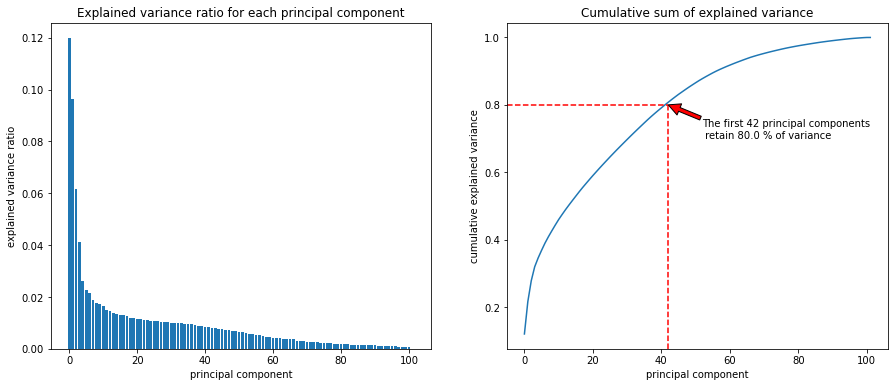

In [13]:
# plot the variance and its cumulative
from turtle import color

# Prepare to plot in ax1 and ax2
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.bar(compo, pca_var)
ax1.set_xlabel('principal component')
ax1.set_ylabel('explained variance ratio')
ax1.set_title('Explained variance ratio for each principal component')
ax2.plot(compo, cum_pca_var)
ax2.set_xlabel('principal component')
ax2.set_ylabel('cumulative explained variance')
ax2.set_title('Cumulative sum of explained variance')

# annotate the ax2 (cumulative sum of variance)
# get coordinate of max and min value of x and y axis
(ax2_xlim_min, ax2_xlim_max) = ax2.get_xlim()
(ax2_ylim_min, ax2_ylim_max) = ax2.get_ylim()
# set the stopping coordinate of annotation line
xmax = (n_components-ax2_xlim_min)/(ax2_xlim_max-ax2_xlim_min) 
ymax = (target_explained_var-ax2_ylim_min)/(ax2_ylim_max-ax2_ylim_min) 

ax2.axvline(x=n_components, ymin=0, ymax=ymax, color='red', linestyle='dashed')
ax2.axhline(y=target_explained_var, xmin=0, xmax=xmax, color='red', linestyle='dashed')
annotation_str = 'The first {0} principal components\n retain {1} % of variance'.format(n_components, target_explained_var*100)
ax2.annotate(
    # annotation label and its coordinate
    annotation_str, xy=(n_components,target_explained_var), xytext=(n_components+10,target_explained_var-0.1),
    # arrow pointer
    arrowprops=dict(facecolor='red')
)
plt.show()

In [14]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X_scale)

### Discussion 2.2: Perform Dimensionality Reduction
(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding dimensionality reduction. How many principal components / transformed features are you retaining for the next step of the analysis?)

*Out of 102 variables, I used PCA to reduce the dimension to 42. These 42 principal components are derived from my target to retain 80% variance to explain the original data.*

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [15]:
import seaborn as sns

# This function will plot the top 10 absolute weight for a certain principal component 
def plot_principal_component_weight(df, pca_components, component_number):
    # create a dataframe to hold column name, weight, absolute value of weight, the direction of weight
    pca_dict = {col: weight for col, weight in zip(df.columns, pca_components[component_number])}
    pca_df = pd.DataFrame.from_dict(pca_dict, orient='index', columns=['weight'])
    pca_df['weight_abs'] = np.absolute(pca_df['weight'])
    pca_df['direction'] = pca_df['weight'].apply(lambda x: -1 if x < 0 else 1)
    pca_df = pca_df.sort_values(by='weight_abs', ascending=False)

    # plot the weight
    fig, ax = plt.subplots(figsize=(12,5))
    sns.barplot(x='index', y='weight_abs', hue='direction', data=pca_df.iloc[0:10,:].reset_index(), ax=ax)
    plt.ylabel('absolute weight')
    plt.xlabel('variable name')
    plt.title('sorted weight of the principal component #{0}'.format(component_number))
    plt.xticks(rotation=45)
    plt.show()

    # print the corresponding weight
    print('top 10 variable with the highest weighnt in principal component #{0} :'.format(component_number))
    print(pca_df.head(10))

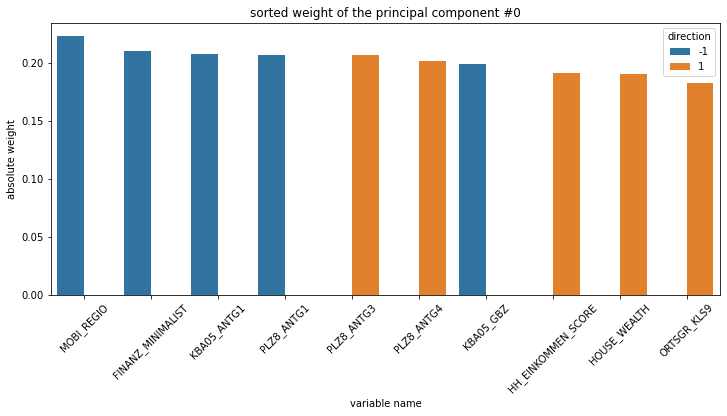

top 10 variable with the highest weighnt in principal component #0 :
                      weight  weight_abs  direction
MOBI_REGIO         -0.223084    0.223084         -1
FINANZ_MINIMALIST  -0.209845    0.209845         -1
KBA05_ANTG1        -0.207686    0.207686         -1
PLZ8_ANTG1         -0.206783    0.206783         -1
PLZ8_ANTG3          0.206651    0.206651          1
PLZ8_ANTG4          0.201996    0.201996          1
KBA05_GBZ          -0.198865    0.198865         -1
HH_EINKOMMEN_SCORE  0.191198    0.191198          1
HOUSE_WEALTH        0.190032    0.190032          1
ORTSGR_KLS9         0.183038    0.183038          1


In [16]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
plot_principal_component_weight(df=azdias, pca_components=pca.components_, component_number=0)

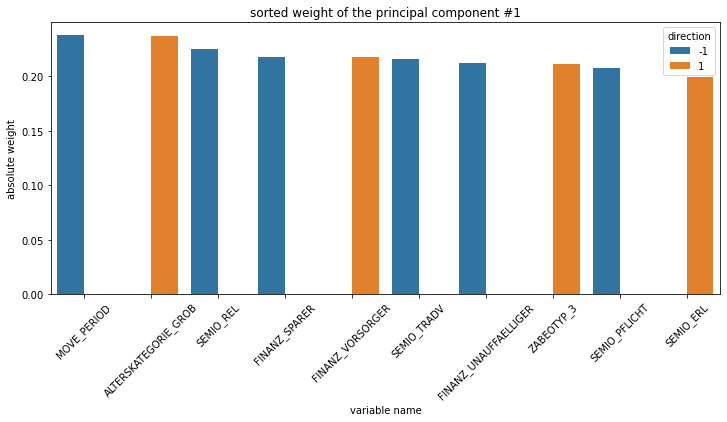

top 10 variable with the highest weighnt in principal component #1 :
                         weight  weight_abs  direction
MOVE_PERIOD           -0.237577    0.237577         -1
ALTERSKATEGORIE_GROB   0.236840    0.236840          1
SEMIO_REL             -0.224936    0.224936         -1
FINANZ_SPARER         -0.217963    0.217963         -1
FINANZ_VORSORGER       0.217578    0.217578          1
SEMIO_TRADV           -0.215821    0.215821         -1
FINANZ_UNAUFFAELLIGER -0.212085    0.212085         -1
ZABEOTYP_3             0.211685    0.211685          1
SEMIO_PFLICHT         -0.207166    0.207166         -1
SEMIO_ERL              0.199591    0.199591          1


In [17]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
plot_principal_component_weight(df=azdias, pca_components=pca.components_, component_number=1)

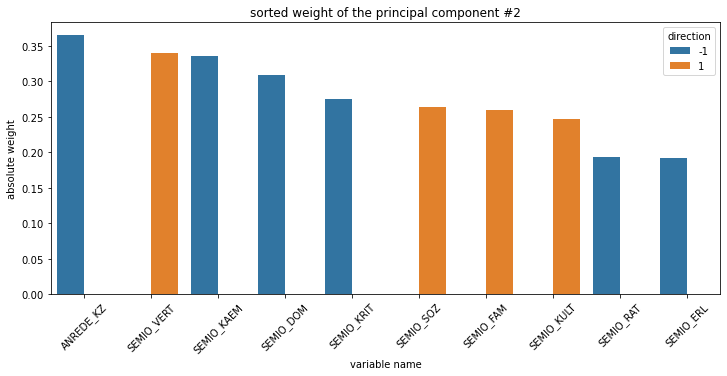

top 10 variable with the highest weighnt in principal component #2 :
              weight  weight_abs  direction
ANREDE_KZ  -0.364598    0.364598         -1
SEMIO_VERT  0.339605    0.339605          1
SEMIO_KAEM -0.334990    0.334990         -1
SEMIO_DOM  -0.308630    0.308630         -1
SEMIO_KRIT -0.275061    0.275061         -1
SEMIO_SOZ   0.264203    0.264203          1
SEMIO_FAM   0.259306    0.259306          1
SEMIO_KULT  0.246189    0.246189          1
SEMIO_RAT  -0.193859    0.193859         -1
SEMIO_ERL  -0.191227    0.191227         -1


In [17]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
plot_principal_component_weight(df=azdias, pca_components=pca.components_, component_number=2)

### Discussion 2.3: Interpret Principal Components

(Double-click this cell and replace this text with your own text, reporting your observations from detailed investigation of the first few principal components generated. Can we interpret positive and negative values from them in a meaningful way?)

*The interpretation of the first 3 principal components is summarized below.*
- *Principal component #0: this component lights up when somebody lives in dense neighborhood (large community) with low income, low weath, and low financial interest -> area/community level*
- *Principal component #1: this component matches wealthy old person. Wealthy old person have some characteristics like: frugal, financially prepared, traditional minded, religious, fair supplied towards energy consumption -> person level*
- *Principal component #1: this component matches male with strong/dominant personality. Some characteristics of people with this personality: competitive, dominant, rational & critical minded, individualistic, not family- nor cultural-oriented -> person level*

*For your reference of how I got interpretation as above, I used the table below which lists the meaning of the top-10 variables in the first 3 principal components.*

|VarName|Weight|PCA_num|VarCat|Data_Dictionary description|Ordinal/interval|Meaning|
|-------|------|-------|------|-------|----------------|--------------|
|MOBI_REGIO|-0.223084|0|RR1 region|movement pattern|1 high move, 5 low move|move a lot|
|FINANZ_MINIMALIST|-0.209845|0|Person level|Low financial interest|1 very high, 5 very low|low financial interest|
|KBA05_ANTG1|-0.207686|0|RR3 micro cell|Number of 1-2 family houses in the microcell|0 no family home, 4 high family home|area with less 1-2 family home|
|PLZ8_ANTG1|-0.206783|0|PLZ8 macro cell|Number of 1-2 family houses in the PLZ8|0 no family home, 4 high family home|area with less 1-2 family home|
|PLZ8_ANTG3|0.206651|0|PLZ8 macro cell|Number of 6-10 family houses in the PLZ8|0 no family home, 4 high family home|area with a lot of 6-10 family home|
|PLZ8_ANTG4|0.201996|0|PLZ8 macro cell|Number of 10+ family houses in the PLZ8|0 no family home, 4 high family home|area with a lot of 10+ family home|
|KBA05_GBZ|-0.198865|0|RR3 micro cell|Number of building in the microcell|1 1-2 buildings, 5 >=23 buildings|area with small number of buildings|
|HH_EINKOMMEN_SCORE|0.191198|0|Household-level|Estimated household net income|1 highest income, 6 very low income|low income|
|HOUSE_WEALTH|0.190032|0|RR4 micro-cell|Household wealth|1 wealthy household, 5 poor household|poor household|
|ORTSGR_KLS9|0.183038|0|Community-level|Size of community|1 <= 2000 people, 9 >700000 people|large community|
|MOVE_PERIOD|-0.237577|1|Person level|Dominating movement of person's youth|1 40s, 5 90s|old|
|ALTERSKATEGORIE_GROB|0.23684|1|Person level|Age|1 < 30 years old, 4 > 60 years old|old|
|SEMIO_REL|-0.224936|1|Person level|Religious personality|1 high affinity, 7 low affinity|religious|
|FINANZ_SPARER|-0.217963|1|Person level|Money saver|1 very high, 5 very low|money saver|
|FINANZ_VORSORGER|0.217578|1|Person level|Be prepared financially|1 very high, 5 very low|financially prepared|
|SEMIO_TRADV|-0.215821|1|Person level|Traditional-minded personality|1 high affinity, 7 low affinity|traditional|
|FINANZ_UNAUFFAELLIGER|-0.212085|1|Person level|Inconspicuous (being discreet about wealth, no show off)|1 very high, 5 very low|no show off wealth|
|ZABEOTYP_3|0.211685|1|Person level|Energy consumption typology (fair supplied)|1 fair supplied, 0 not fair supplied|fair supplied energy consumption|
|SEMIO_PFLICHT|-0.207166|1|Person level|Dutiful personality|1 high affinity, 7 low affinity|dutiful|
|SEMIO_ERL|0.199591|1|Person level|Event-oriented personality|1 high affinity, 7 low affinity|not event oriented personality|
|ANREDE_KZ|-0.364598|2|Person level|Gender|1 male, 2 female|Male|
|SEMIO_VERT|0.339603|2|Person level|Dreamful personality|1 high affinity, 7 low affinity|not dreamful|
|SEMIO_KAEM|-0.334991|2|Person level|Combative attitude personality|1 high affinity, 7 low affinity|combative/competitive|
|SEMIO_DOM|-0.308631|2|Person level|Dominant-minded personality|1 high affinity, 7 low affinity|dominant|
|SEMIO_KRIT|-0.275063|2|Person level|Critical-minded personality|1 high affinity, 7 low affinity|critical minded|
|SEMIO_SOZ|0.2642|2|Person level|Socially-minded personality|1 high affinity, 7 low affinity|individualistic|
|SEMIO_FAM|0.259305|2|Person level|Family-minded personality|1 high affinity, 7 low affinity|not family oriented|
|SEMIO_KULT|0.246188|2|Person level|Cultural-minded personality|1 high affinity, 7 low affinity|not cultural oriented|
|SEMIO_RAT|-0.193859|2|Person level|Rational personality|1 high affinity, 7 low affinity|rational|
|SEMIO_ERL|-0.191228|2|Person level|Event-oriented personality|1 high affinity, 7 low affinity|not event oriented personality|

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [20]:
[i for i in range(4,42,2)]

[4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]

In [18]:
# Over a number of different cluster counts...
from random import random
from sklearn.cluster import MiniBatchKMeans
kmeans_scores = []
k_s = [i for i in range(4,42,2)] # [4, 6, 8,..., 38, 40]

for k in k_s:
    # use MiniBatchKMeans as our sample data is more than 10,000 
    # (recommended by Sklearn documentation to speed up process)
    # run k-means clustering on the data and...
    kmeans_model = MiniBatchKMeans(n_clusters=k, batch_size=1024, random_state=42)
    kmeans_model.fit(X_pca)
    
    # compute the average within-cluster distances.
    kmeans_scores.append(np.abs(kmeans_model.score(X_pca)))

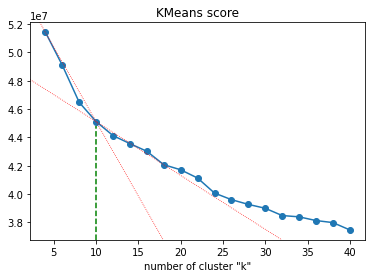

In [21]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.

# create the scree plot
plt.plot(k_s, kmeans_scores, 'o-')
plt.title('scree plot of KMeans score')
plt.xlabel('number of cluster "k"')
plt.title('KMeans score')

# add line annotation
plt.axline(xy1=(k_s[0],kmeans_scores[0]), xy2=(k_s[3],kmeans_scores[3]), color='red', linestyle='dotted', linewidth=0.75)
plt.axline(xy1=(k_s[3],kmeans_scores[3]), xy2=(k_s[7],kmeans_scores[7]), color='red', linestyle='dotted', linewidth=0.75)
plt.axvline(x=10, ymax=0.525, color='green', linestyle='dashed')
plt.show()

In [22]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

# The "elbow" of KMeans score seems to be around k=10
kmeans_10_model = MiniBatchKMeans(n_clusters=10, batch_size=1024, random_state=42)
kmeans_10_model.fit(X_pca)
kmeans_10_pred = kmeans_10_model.predict(X_pca)

### Discussion 3.1: Apply Clustering to General Population
(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding clustering. Into how many clusters have you decided to segment the population?)

*From the plot of KMeans score above, it seems that the elbow is around k=10, i.e. the reduction in KMeans score (average internal distance) seems becoming smaller compared to smaller k. I added 2 annotation line as a helper to preview the slope (the intuition of elbow method is to look for the contrast of slope).*

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [23]:
# Load in the customer demographics data.
customers = pd.read_csv("Udacity_CUSTOMERS_Subset.csv",sep=';')

```
feature_info = feat_info
feature_info['missing_or_unknown'] = feature_info['missing_or_unknown'].replace({"[-1,X]":"[-1,'X']","[XX]":"['XX']","[-1,XX]":"[-1,'XX']"})
for col in customers.columns:
    # get the characters that symbolize missing value (still represented as Python string)
    missing_as_string = feature_info.set_index(keys=['attribute']).loc[col,'missing_or_unknown']
    
    # convert the list of missing value from Python string into Python list
    missing_as_list = convert_string_rep_of_list_to_list(missing_as_string)
    
    # replace the missing values into Numpy NaN
    # if the missing_or_unknown value for feat_info is not equal to "[]", i.e. list member equal to 0
    if len(missing_as_list) >= 1:
        customers[col].replace(to_replace=missing_as_list,value=[np.nan]*len(missing_as_list),inplace=True)
```

```
customers = drop_cols_with_lot_of_nan(customers, threshold_ratio=0.2)
```

```
customers = drop_rows_with_lot_of_nan(customers,threshold_value=20)
```

```
categorical_cols_to_drop = ['FINANZTYP','LP_FAMILIE_FEIN','LP_STATUS_FEIN','CAMEO_DEUG_2015','CAMEO_DEU_2015']
for col in categorical_cols_to_drop:
    if col in customers.columns:
        customers = customers.drop(col, axis=1)

```

```

feature_info = feat_info
feature_info['missing_or_unknown'] = feature_info['missing_or_unknown'].replace({"[-1,X]":"[-1,'X']","[XX]":"['XX']","[-1,XX]":"[-1,'XX']"})
for col in df.columns:
    # get the characters that symbolize missing value (still represented as Python string)
    missing_as_string = feature_info.set_index(keys=['attribute']).loc[col,'missing_or_unknown']
    
    # convert the list of missing value from Python string into Python list
    missing_as_list = convert_string_rep_of_list_to_list(missing_as_string)
    
    # replace the missing values into Numpy NaN
    # if the missing_or_unknown value for feat_info is not equal to "[]", i.e. list member equal to 0
    if len(missing_as_list) >= 1:
        df[col].replace(to_replace=missing_as_list,value=[np.nan]*len(missing_as_list),inplace=True)

# PART 2/4 - Remove rows and columns based on number of missing values
# Remove some columns based on number of missing values
df = drop_cols_with_lot_of_nan(df, threshold_ratio=0.2)

## Remove some rows based on number of missing values
df = drop_rows_with_lot_of_nan(df,threshold_value=20)

# PART 3/4 - Engineer/Re-encode categorical variables
# Drop unnecessary categorical columns based on the table in Discussion 1.2.1.
categorical_cols_to_drop = ['FINANZTYP','LP_FAMILIE_FEIN','LP_STATUS_FEIN','CAMEO_DEUG_2015','CAMEO_DEU_2015']
for col in categorical_cols_to_drop:
    if col in df.columns:
        df = df.drop(col, axis=1)

# Replace values in column GEBAEUDETYP
df['GEBAEUDETYP'] = df['GEBAEUDETYP'].replace(to_replace=[1, 2], value='res')
df['GEBAEUDETYP'] = df['GEBAEUDETYP'].replace(to_replace=[3, 4, 5, 6, 7, 8], value='non_res')

# Perform one hot encoding for selected categorical variable(s)
cols_to_ohe = ['CJT_GESAMTTYP','GFK_URLAUBERTYP','LP_FAMILIE_GROB','LP_STATUS_GROB','NATIONALITAET_KZ','SHOPPER_TYP','ZABEOTYP','GEBAEUDETYP','OST_WEST_KZ']
df = pd.get_dummies(data=df,
                prefix=cols_to_ohe,
                columns=cols_to_ohe,
                drop_first=True)

# PART 4/4 - Perform feature engineering/encoding for mixed-type variables
df = break_praegende_jugendjahre(df)
df = break_cameo_intl_2015(df)
df = break_wohnlage(df)
df = convert_plz8_baumax(df)
df = drop_unnecessary_mixed_cols(df)

```

In [24]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

# data cleansing
customers = clean_data(customers)

In [25]:
# impute missing data, scaling, dimension reduction
cust_impute = imputer.transform(customers)
cust_scale = scaler.transform(cust_impute)
cust_pca = pca.transform(cust_scale)

# predict clustering
cust_10_pred = kmeans_10_model.predict(cust_pca)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

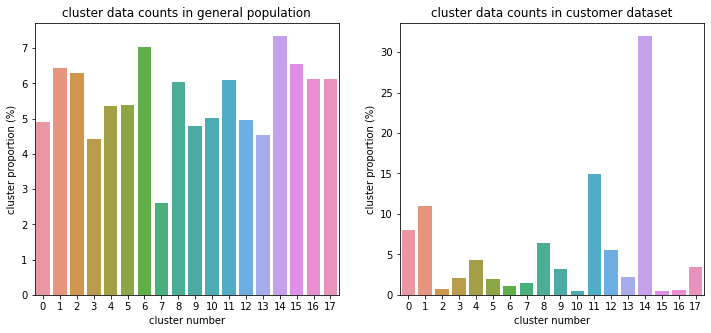

In [25]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

# Calculate the percent representation of each cluster
generalpop_label = pd.Series(kmeans_18_pred)
generalpop_label_pct = generalpop_label.value_counts()/generalpop_label.count()*100

cust_data_label = pd.Series(cust_18_pred)
cust_data_label_pct = cust_data_label.value_counts()/cust_data_label.count()*100

# barplot with seaborn
fig,axes = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(x=generalpop_label_pct.index, y=generalpop_label_pct, ax=axes[0])
sns.barplot(x=cust_data_label_pct.index, y=cust_data_label_pct, ax=axes[1])
axes[0].set_title("cluster data counts in general population")
axes[1].set_title("cluster data counts in customer dataset")
axes[0].set_xlabel("cluster number")
axes[1].set_xlabel("cluster number")
axes[0].set_ylabel("cluster proportion (%)")
axes[1].set_ylabel("cluster proportion (%)")
plt.show()

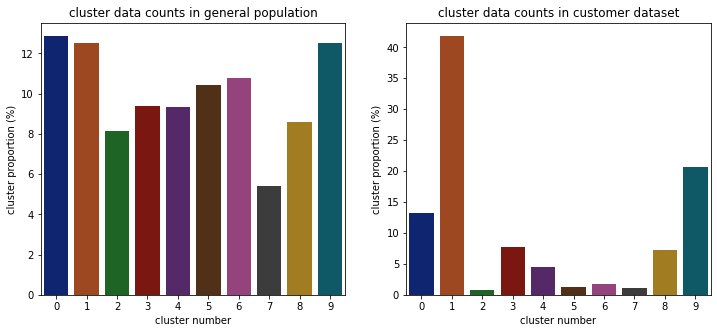

In [48]:
generalpop_label = pd.Series(kmeans_10_pred)
generalpop_label_pct = generalpop_label.value_counts()/generalpop_label.count()*100

cust_data_label = pd.Series(cust_10_pred)
cust_data_label_pct = cust_data_label.value_counts()/cust_data_label.count()*100

# barplot with seaborn
sns.set_palette('dark')
fig,axes = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(x=generalpop_label_pct.index, y=generalpop_label_pct, ax=axes[0])
sns.barplot(x=cust_data_label_pct.index, y=cust_data_label_pct, ax=axes[1])
axes[0].set_title("cluster data counts in general population")
axes[1].set_title("cluster data counts in customer dataset")
axes[0].set_xlabel("cluster number")
axes[1].set_xlabel("cluster number")
axes[0].set_ylabel("cluster proportion (%)")
axes[1].set_ylabel("cluster proportion (%)")
plt.show()

In [54]:
k10_centroid_1_pca = pca.inverse_transform(kmeans_10_model.cluster_centers_[1])
k10_centroid_1_scale = k10_centroid_1_pca * np.sqrt(scaler.var_) + scaler.mean_
k10_centroid_1 = pd.Series(data=k10_centroid_1_scale, index=customers.columns)

print(k10_centroid_1[['IS_RURAL','ALTERSKATEGORIE_GROB','GREEN_AVANTGARDE','ANREDE_KZ','HH_EINKOMMEN_SCORE','ANZ_PERSONEN']])
print(k10_centroid_1[['FINANZ_HAUSBAUER','FINANZ_MINIMALIST','FINANZ_SPARER','FINANZ_UNAUFFAELLIGER','FINANZ_VORSORGER']])
print(k10_centroid_1[['SEMIO_DOM','SEMIO_ERL','SEMIO_FAM','SEMIO_KAEM','SEMIO_KRIT','SEMIO_KULT','SEMIO_LUST','SEMIO_MAT','SEMIO_PFLICHT','SEMIO_RAT','SEMIO_REL','SEMIO_SOZ','SEMIO_TRADV','SEMIO_VERT']])

IS_RURAL                0.129142
ALTERSKATEGORIE_GROB    3.364703
GREEN_AVANTGARDE        1.019119
ANREDE_KZ               1.506209
HH_EINKOMMEN_SCORE      2.266622
ANZ_PERSONEN            2.286263
dtype: float64
FINANZ_HAUSBAUER         2.026434
FINANZ_MINIMALIST        4.601484
FINANZ_SPARER            1.607545
FINANZ_UNAUFFAELLIGER    2.155399
FINANZ_VORSORGER         4.205740
dtype: float64
SEMIO_DOM        4.752426
SEMIO_ERL        5.225129
SEMIO_FAM        3.403231
SEMIO_KAEM       4.271708
SEMIO_KRIT       4.414938
SEMIO_KULT       3.458861
SEMIO_LUST       5.276988
SEMIO_MAT        3.114627
SEMIO_PFLICHT    3.154131
SEMIO_RAT        3.143628
SEMIO_REL        2.919681
SEMIO_SOZ        4.056204
SEMIO_TRADV      3.007571
SEMIO_VERT       4.688307
dtype: float64


In [51]:
k10_centroid_2_pca = pca.inverse_transform(kmeans_10_model.cluster_centers_[2])
k10_centroid_2_scale = k10_centroid_2_pca * np.sqrt(scaler.var_) + scaler.mean_
k10_centroid_2 = pd.Series(data=k10_centroid_2_scale, index=customers.columns)

print(k10_centroid_2[['IS_RURAL','ALTERSKATEGORIE_GROB','GREEN_AVANTGARDE','ANREDE_KZ','HH_EINKOMMEN_SCORE','ANZ_PERSONEN']])
print(k10_centroid_2[['FINANZ_HAUSBAUER','FINANZ_MINIMALIST','FINANZ_SPARER','FINANZ_UNAUFFAELLIGER','FINANZ_VORSORGER']])
print(k10_centroid_2[['SEMIO_DOM','SEMIO_ERL','SEMIO_FAM','SEMIO_KAEM','SEMIO_KRIT','SEMIO_KULT','SEMIO_LUST','SEMIO_MAT','SEMIO_PFLICHT','SEMIO_RAT','SEMIO_REL','SEMIO_SOZ','SEMIO_TRADV','SEMIO_VERT']])

IS_RURAL                0.072631
ALTERSKATEGORIE_GROB    1.837784
GREEN_AVANTGARDE        0.144378
ANREDE_KZ               0.952982
HH_EINKOMMEN_SCORE      5.322801
ANZ_PERSONEN            1.484475
dtype: float64
FINANZ_HAUSBAUER         3.448597
FINANZ_MINIMALIST        1.982437
FINANZ_SPARER            4.414834
FINANZ_UNAUFFAELLIGER    3.964546
FINANZ_VORSORGER         2.050565
dtype: float64
SEMIO_DOM        2.782763
SEMIO_ERL        2.146844
SEMIO_FAM        6.751156
SEMIO_KAEM       2.283011
SEMIO_KRIT       2.706286
SEMIO_KULT       6.860640
SEMIO_LUST       3.029470
SEMIO_MAT        5.275942
SEMIO_PFLICHT    5.581581
SEMIO_RAT        4.133865
SEMIO_REL        6.302758
SEMIO_SOZ        6.424555
SEMIO_TRADV      4.921747
SEMIO_VERT       6.096618
dtype: float64


#### 3.3.1 Method 1: analyze from the PCA space

In [52]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?
# answer: Cluster number 14, 11, 1

print('Overrepresented in customer data compared to general population:')
centroids = [14, 11, 1]

for centroid in centroids:
    # get the coordinate of centroid in pca space
    centroid_pca = kmeans_18_model.cluster_centers_[centroid]

    # look for the most prominent (largest absolute number)
    # numpy argsort sorts the array in ascending order
    centroid_pca_top_idx = np.argsort(np.abs(centroid_pca))

    print('\nTop 3 dimension in centroid', centroid)
    for i in range(3):
        print('Dim #{0} in PCA space is significant; with value of {1}.'.format(centroid_pca_top_idx[-(i+1)],centroid_pca[centroid_pca_top_idx[-(i+1)]]))

Overrepresented in customer data compared to general population:

Top 3 dimension in centroid 14
Dim #0 in PCA space is significant; with value of -3.5352200528222606.
Dim #3 in PCA space is significant; with value of 2.913179441650352.
Dim #2 in PCA space is significant; with value of 2.785027432981375.

Top 3 dimension in centroid 11
Dim #0 in PCA space is significant; with value of -4.110221719344617.
Dim #2 in PCA space is significant; with value of 2.1843090101430223.
Dim #3 in PCA space is significant; with value of -2.0887916168273963.

Top 3 dimension in centroid 1
Dim #0 in PCA space is significant; with value of -3.905762949449218.
Dim #3 in PCA space is significant; with value of 3.4305369977550058.
Dim #2 in PCA space is significant; with value of -1.5793674841373677.


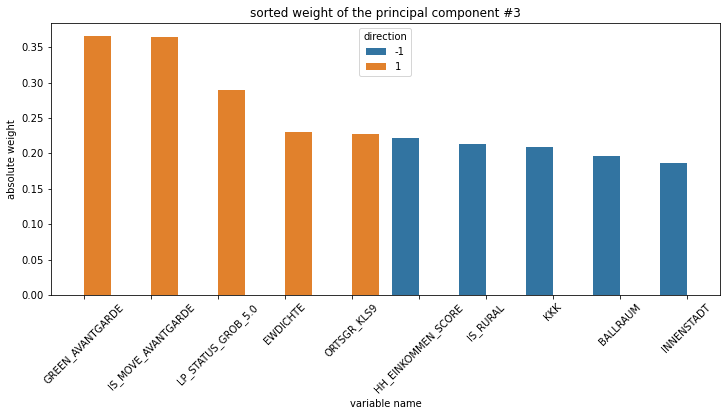

top 10 variable with the highest weighnt in principal component #3 :
                      weight  weight_abs  direction
GREEN_AVANTGARDE    0.365513    0.365513          1
IS_MOVE_AVANTGARDE  0.364777    0.364777          1
LP_STATUS_GROB_5.0  0.290128    0.290128          1
EWDICHTE            0.229796    0.229796          1
ORTSGR_KLS9         0.227623    0.227623          1
HH_EINKOMMEN_SCORE -0.221153    0.221153         -1
IS_RURAL           -0.213113    0.213113         -1
KKK                -0.208548    0.208548         -1
BALLRAUM           -0.195977    0.195977         -1
INNENSTADT         -0.185905    0.185905         -1


In [54]:
# Plot PCA weight to interpret dimension number 3
plot_principal_component_weight(df=azdias, pca_components=pca.components_, component_number=3)

In [53]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
# answer: Cluster number 15, 6, 2

print('Underrepresented in customer data compared to general population:')
centroids = [15, 6, 2]

for centroid in centroids:
    # get the coordinate of centroid in pca space
    centroid_pca = kmeans_18_model.cluster_centers_[centroid]

    # look for the most prominent (largest absolute number)
    # numpy argsort sorts the array in ascending order
    centroid_pca_top_idx = np.argsort(np.abs(centroid_pca))

    print('\nTop 3 dimension in centroid', centroid)
    for i in range(3):
        print('Dim #{0} in PCA space is significant; with value of {1}.'.format(centroid_pca_top_idx[-(i+1)],centroid_pca[centroid_pca_top_idx[-(i+1)]]))

Underrepresented in customer data compared to general population:

Top 3 dimension in centroid 15
Dim #2 in PCA space is significant; with value of -2.956667974857917.
Dim #0 in PCA space is significant; with value of 2.6712265537984807.
Dim #1 in PCA space is significant; with value of -2.419337310720016.

Top 3 dimension in centroid 6
Dim #1 in PCA space is significant; with value of -3.911738418731248.
Dim #2 in PCA space is significant; with value of -3.0160597302964622.
Dim #0 in PCA space is significant; with value of -1.2283466744674998.

Top 3 dimension in centroid 2
Dim #1 in PCA space is significant; with value of -4.652421345362045.
Dim #2 in PCA space is significant; with value of 2.3181635701067655.
Dim #7 in PCA space is significant; with value of -1.1613908207839572.


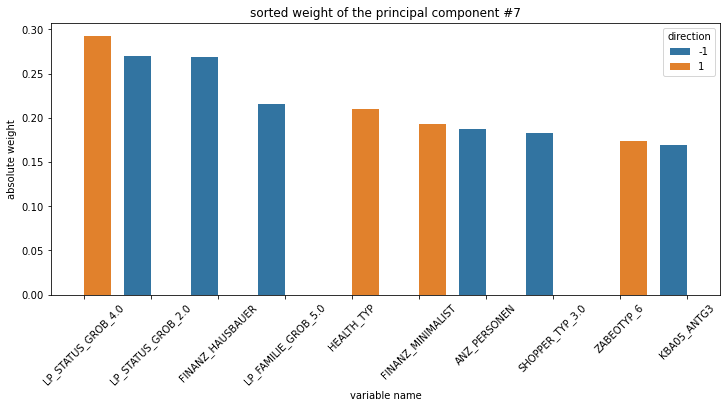

top 10 variable with the highest weighnt in principal component #7 :
                       weight  weight_abs  direction
LP_STATUS_GROB_4.0   0.292918    0.292918          1
LP_STATUS_GROB_2.0  -0.269780    0.269780         -1
FINANZ_HAUSBAUER    -0.268766    0.268766         -1
LP_FAMILIE_GROB_5.0 -0.215492    0.215492         -1
HEALTH_TYP           0.210449    0.210449          1
FINANZ_MINIMALIST    0.192710    0.192710          1
ANZ_PERSONEN        -0.187852    0.187852         -1
SHOPPER_TYP_3.0     -0.182703    0.182703         -1
ZABEOTYP_6           0.174064    0.174064          1
KBA05_ANTG3         -0.169547    0.169547         -1


In [55]:
# Plot PCA weight to interpret dimension number 7
plot_principal_component_weight(df=azdias, pca_components=pca.components_, component_number=7)

Characteristics of people that are **overrepresented** in customer dataset:
- male
- competitive/individualist
- high financial interest, high income
- live in city (cluster 14) or live in rural area (cluster 1, 11)

Characteristics of people that are **underepresented** in customer dataset:
- young
- not financially prepared
- show off wealth, conspicuous
- female and family oriented (cluster 6, 15)
- male and individualist (cluster 2)

<img src="Azdias PCA interpretation.png" />

#### 3.3.2 Method 2: analyze from the original space (inverse transform PCA and scaler)

In [28]:
centroid_14_pca = pca.inverse_transform(kmeans_18_model.cluster_centers_[14])
centroid_14_scale = centroid_14_pca * np.sqrt(scaler.var_) + scaler.mean_
centroid_14 = pd.Series(data=centroid_14_scale, index=customers.columns)

In [35]:
centroid_14[['IS_RURAL','ORTSGR_KLS9','BALLRAUM','EWDICHTE','INNENSTADT']] # city

IS_RURAL       0.135949
ORTSGR_KLS9    5.320288
BALLRAUM       4.132267
EWDICHTE       3.919415
INNENSTADT     4.692127
dtype: float64

In [37]:
centroid_14[['ALTERSKATEGORIE_GROB','IS_MOVE_AVANTGARDE','MOVE_PERIOD']] # age 30-40

ALTERSKATEGORIE_GROB    3.151218
IS_MOVE_AVANTGARDE      1.015390
MOVE_PERIOD             3.830605
dtype: float64

In [39]:
centroid_14[['GREEN_AVANTGARDE','ZABEOTYP_2','ZABEOTYP_3','ZABEOTYP_4','ZABEOTYP_5','ZABEOTYP_6']] # energy - kinda green

GREEN_AVANTGARDE    1.017648
ZABEOTYP_2          0.100850
ZABEOTYP_3          0.243688
ZABEOTYP_4          0.105138
ZABEOTYP_5          0.001967
ZABEOTYP_6          0.048488
dtype: float64

In [40]:
centroid_14[['ANREDE_KZ']] # sex - male

ANREDE_KZ    1.052441
dtype: float64

In [41]:
centroid_14[['HEALTH_TYP','SHOPPER_TYP_2.0','SHOPPER_TYP_3.0']] # health_shop - average health, more hedonist

HEALTH_TYP         2.102671
SHOPPER_TYP_2.0    0.125601
SHOPPER_TYP_3.0    0.214243
dtype: float64

In [43]:
centroid_14[['LP_STATUS_GROB_2.0','LP_STATUS_GROB_3.0','LP_STATUS_GROB_4.0','LP_STATUS_GROB_5.0','HH_EINKOMMEN_SCORE']] # income - high

LP_STATUS_GROB_2.0    0.057481
LP_STATUS_GROB_3.0    0.105008
LP_STATUS_GROB_4.0    0.066712
LP_STATUS_GROB_5.0    0.775642
HH_EINKOMMEN_SCORE    2.277919
dtype: float64

In [42]:
centroid_14[['LP_FAMILIE_GROB_2.0','LP_FAMILIE_GROB_3.0','LP_FAMILIE_GROB_4.0','LP_FAMILIE_GROB_5.0','ANZ_PERSONEN']] # family size - small

LP_FAMILIE_GROB_2.0    0.166479
LP_FAMILIE_GROB_3.0    0.018015
LP_FAMILIE_GROB_4.0    0.105321
LP_FAMILIE_GROB_5.0    0.399654
ANZ_PERSONEN           2.314593
dtype: float64

In [44]:
centroid_14[['FINANZ_HAUSBAUER','FINANZ_MINIMALIST','FINANZ_SPARER','FINANZ_UNAUFFAELLIGER','FINANZ_VORSORGER']] # Financial philosophy - high financial interest, safer, but kinda hedon

FINANZ_HAUSBAUER         1.780914
FINANZ_MINIMALIST        4.783306
FINANZ_SPARER            1.841648
FINANZ_UNAUFFAELLIGER    2.340423
FINANZ_VORSORGER         4.005313
dtype: float64

In [45]:
centroid_14[['SEMIO_DOM','SEMIO_ERL','SEMIO_FAM','SEMIO_KAEM','SEMIO_KRIT','SEMIO_KULT','SEMIO_PFLICHT','SEMIO_RAT','SEMIO_REL','SEMIO_SOZ','SEMIO_TRADV','SEMIO_VERT']] 
    # Psychology - low cultural, low family, low dreamful, low social

SEMIO_DOM        3.352372
SEMIO_ERL        3.938545
SEMIO_FAM        4.963645
SEMIO_KAEM       2.657702
SEMIO_KRIT       3.131824
SEMIO_KULT       5.063714
SEMIO_PFLICHT    3.469712
SEMIO_RAT        2.838356
SEMIO_REL        3.961223
SEMIO_SOZ        5.339336
SEMIO_TRADV      3.332880
SEMIO_VERT       6.265498
dtype: float64

### Discussion 3.3: Compare Customer Data to Demographics Data

(Double-click this cell and replace this text with your own text, reporting findings and conclusions from the clustering analysis. Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?)

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.